# **Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# **Load Data**

In [2]:
loan_default_df = pd.read_csv('Loan_default.csv')

# **Exploratory Data Analysis**

In [3]:
loan_default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [4]:
loan_default_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [5]:
loan_default_df.head(25)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


In [6]:
#Find out what the different values for LoanPurpose are
loan_default_df['LoanPurpose'].value_counts()

,count
LoanPurpose,
Business,51298
Home,51286
Education,51005
Other,50914
Auto,50844


**We experimented running the models against different loan purpose types and did not see any improvements in any of the results**

In [7]:
loan_default_df['Default'].value_counts()

,count
Default,
0,225694
1,29653


**Dataset is not balanced with the overwhelming majority of loans not defaulting**

In [8]:
loan_default_df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,85302
Divorced,85033
Single,85012


In [9]:
loan_default_df['Education'].value_counts()

,count
Education,
Bachelor's,64366
High School,63903
Master's,63541
PhD,63537


In [10]:
loan_default_df['HasDependents'].value_counts()

,count
HasDependents,
Yes,127742
No,127605


In [11]:
loan_default_df['HasMortgage'].value_counts()

,count
HasMortgage,
Yes,127677
No,127670


In [12]:
loan_default_df['EmploymentType'].value_counts()

,count
EmploymentType,
Part-time,64161
Unemployed,63824
Self-employed,63706
Full-time,63656


In [13]:
loan_default_df['LoanTerm'].value_counts()

,count
LoanTerm,
48,51166
60,51154
36,51061
24,51009
12,50957


In [14]:
loan_default_df['HasCoSigner'].value_counts()

,count
HasCoSigner,
Yes,127701
No,127646


**Other categorical columns besides Default are evenly distributed.  It looks like the dataset may be synthetic or has been cherry picked from a much larger dataset**

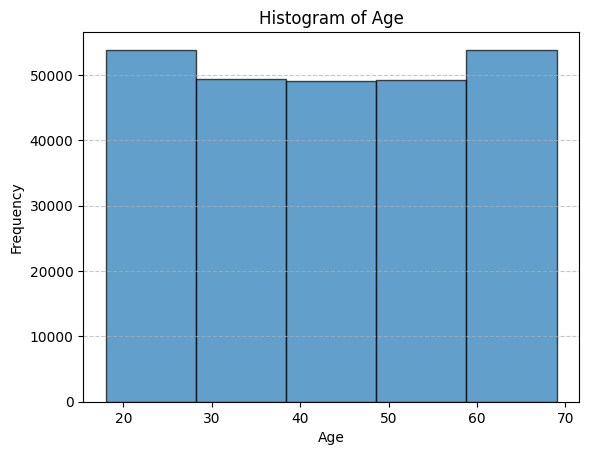

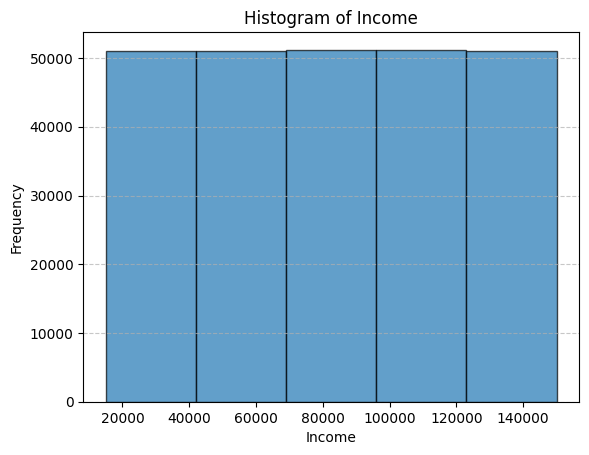

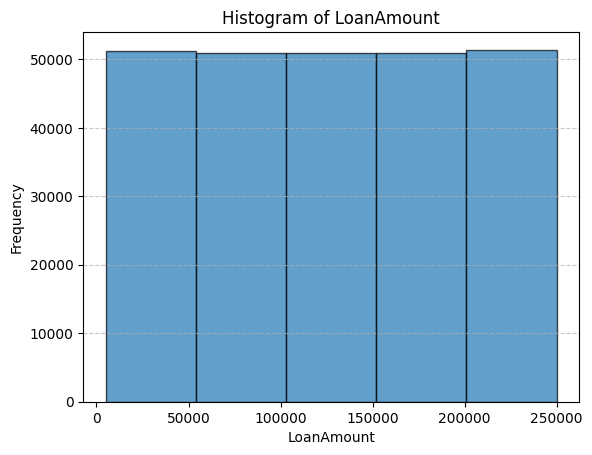

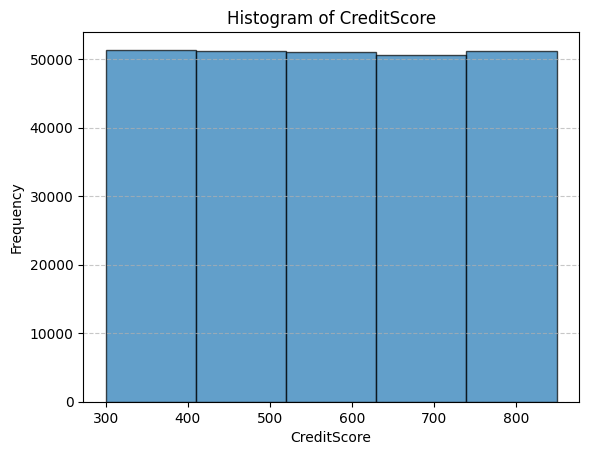

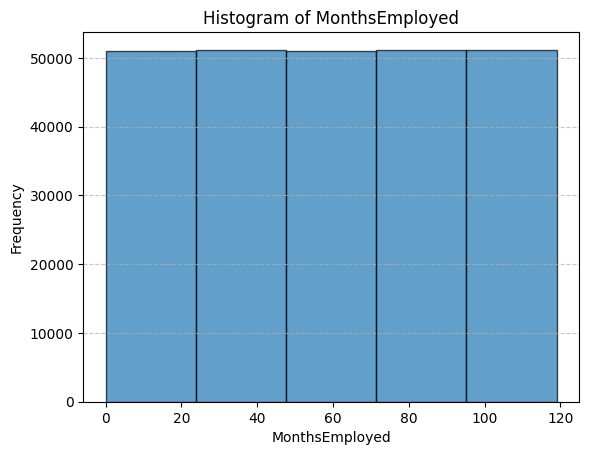

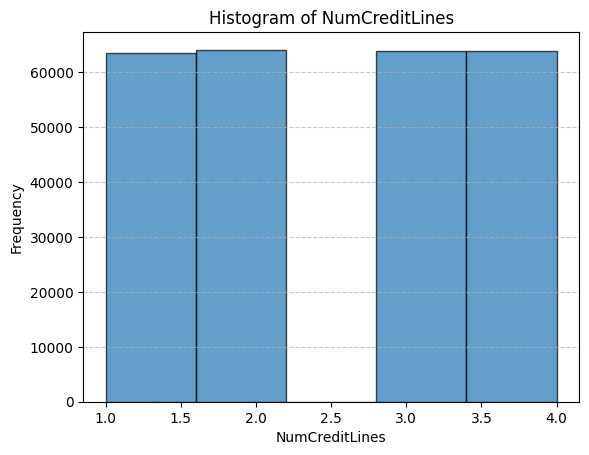

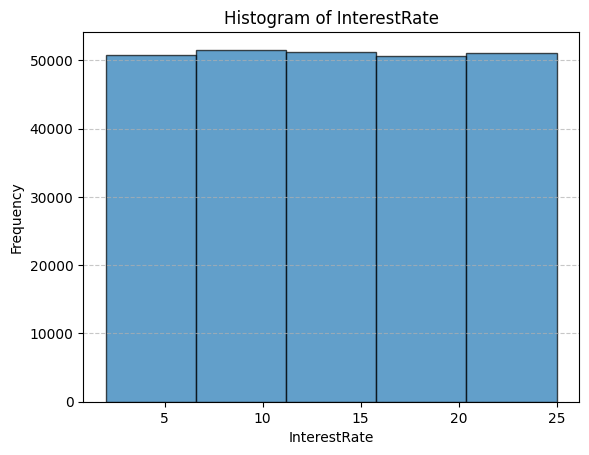

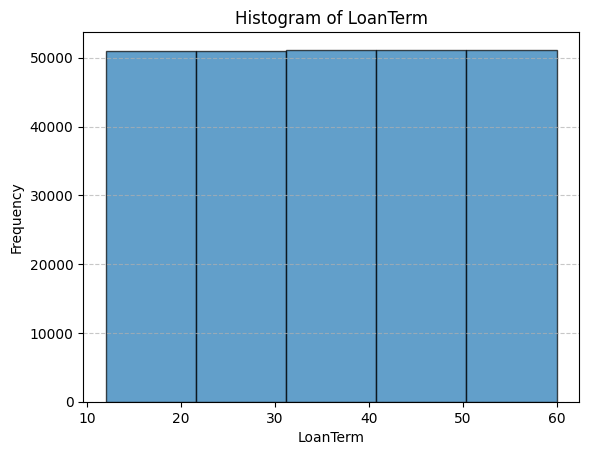

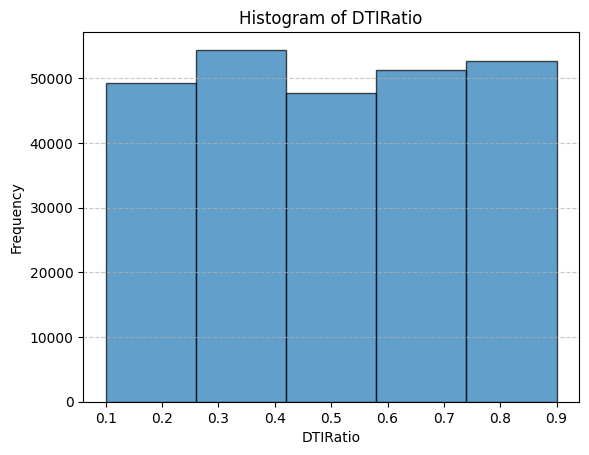

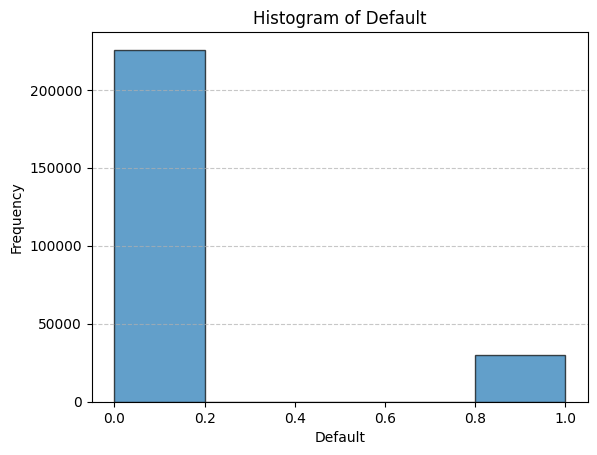

In [15]:
# Identifying numerical columns for histogram visualization
numerical_columns = loan_default_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Function to plot histograms with 4–5 bins
def plot_histograms_fixed_bins(dataframe, numerical_columns, bins=5):
    for col in numerical_columns:
        # Plot histogram with fixed bins
        plt.figure()
        plt.hist(dataframe[col], bins=bins, edgecolor='black', alpha=0.7)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# Plot histograms with 4–5 bins for numerical columns
plot_histograms_fixed_bins(loan_default_df, numerical_columns, bins=5)

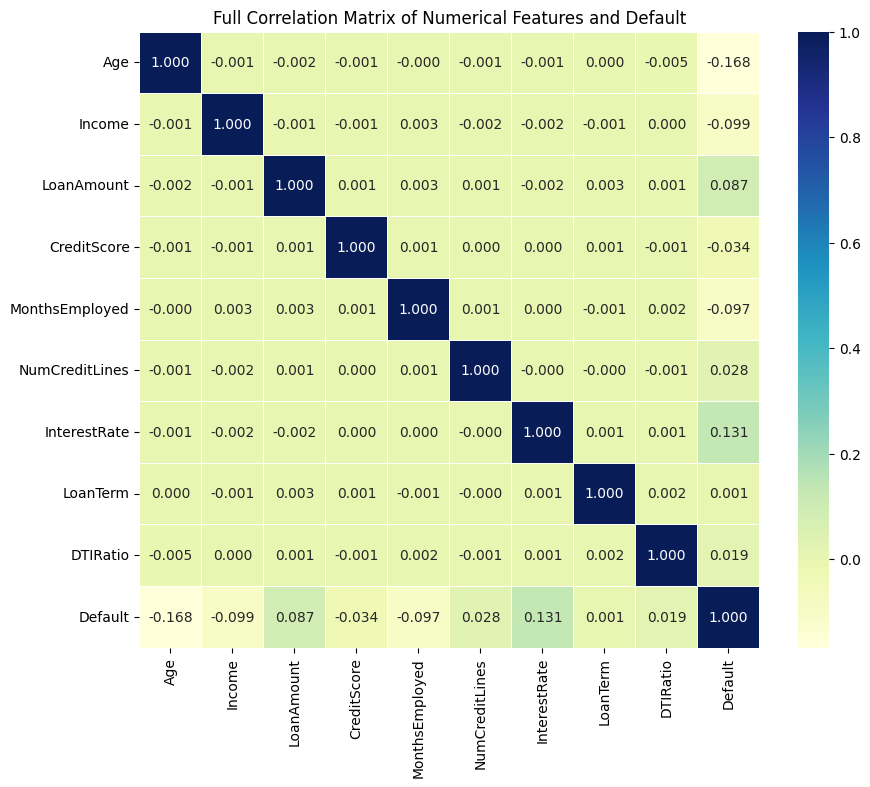

In [16]:
# Calculate the full correlation matrix for all numerical features including 'Default'
full_correlation_matrix = loan_default_df[numerical_columns].corr()

# Plot the full correlation matrix heatmap with a blue-green-yellow color scheme
plt.figure(figsize=(10, 8))
sns.heatmap(
    full_correlation_matrix,
    annot=True,
    cmap='YlGnBu',  # Blue-Green-Yellow color palette
    fmt='.3f',
    linewidths=0.5,
    cbar=True
)
plt.title('Full Correlation Matrix of Numerical Features and Default')
plt.show()

# **Feature Engineering**

First potential feature combination: HasMortgage and HasDependents into a single feature called Financial_Obligations . This can provide a more holistic view of a borrower's financial responsibilities. this can help in discern whether a borrower might default on a loan:
1. Understanding Financial Burden:
Mortgage: If a borrower has a mortgage, they have a significant monthly obligation that affects their disposable income. This can impact their ability to repay additional loans.
Dependents: Having dependents often means additional expenses (e.g., childcare, education, healthcare), which can strain a borrower's budget. More dependents can indicate higher financial responsibility.
By combining these two features, we can create a single metric that reflects the overall financial burden on the borrower. A borrower with both a mortgage and dependents may be under more financial pressure than someone with just one or neither.
2. Creating a Categorical Understanding:
The combined feature can be categorized into levels of financial obligation, such as:
No Financial Obligations: Neither mortgage nor dependents.
Low Financial Obligations: Has either a mortgage or dependents.
High Financial Obligations: Has both a mortgage and dependents.
This categorization can help the model understand different risk levels associated with borrowers. For example, borrowers with high financial obligations may be more likely to default due to competing financial demands.
3. Improving Model Interpretability:
By using a single feature instead of two separate ones, we can reduce the complexity of the model. This makes it easier to interpret the impact of financial obligations on loan default risk.
It helps in identifying patterns: For instance, if borrowers with high financial obligations consistently show a higher default rate, this can be a strong indicator for the model.
4. Feature Interaction:
The interaction between having a mortgage and dependents can be more predictive than considering them separately. For example, a borrower with a high mortgage and several dependents may be at a higher risk of default than someone with just a mortgage or just dependents.
This combined feature captures the interplay between different financial responsibilities, which can be crucial for predicting defaults.
Example of Implementation:
We can create the Financial_Obligations feature as follows:
df['Financial_Obligations'] = df['HasMortgage'].map({'Yes': 1, 'No': 0}) + df['HasDependents'].map({'Yes': 1, 'No': 0})
In this example:
If a borrower has both a mortgage and dependents, Financial_Obligations would equal 2.
If they have neither, it would equal 0.
If they have one of the two, it would equal 1.
Conclusion:
By combining HasMortgage and HasDependents into a single feature, we can provide our model with a clearer picture of a borrower's financial situation, which can enhance its ability to predict loan defaults. This approach may help capture the complexity of financial obligations in a more manageable way, ultimately leading to better predictions and insights.


In [17]:
loan_default_df['Financial_Obligations'] = loan_default_df['HasMortgage'].map({'Yes': 1, 'No': 0}) + loan_default_df['HasDependents'].map({'Yes': 1, 'No': 0})

In [18]:
loan_default_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Financial_Obligations
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,2
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,2
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,1


In [19]:
loan_default_df['Financial_Obligations'].value_counts()

,count
Financial_Obligations,
1,127665
2,63877
0,63805


In [20]:
loan_default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LoanID                 255347 non-null  object 
 1   Age                    255347 non-null  int64  
 2   Income                 255347 non-null  int64  
 3   LoanAmount             255347 non-null  int64  
 4   CreditScore            255347 non-null  int64  
 5   MonthsEmployed         255347 non-null  int64  
 6   NumCreditLines         255347 non-null  int64  
 7   InterestRate           255347 non-null  float64
 8   LoanTerm               255347 non-null  int64  
 9   DTIRatio               255347 non-null  float64
 10  Education              255347 non-null  object 
 11  EmploymentType         255347 non-null  object 
 12  MaritalStatus          255347 non-null  object 
 13  HasMortgage            255347 non-null  object 
 14  HasDependents          255347 non-nu

Second potential engineered feature: The "loan amount to income ratio" is a useful feature in predicting loan performance. It may provide insight into a borrower's financial situation. This ratio helps to assess the borrower's ability to repay the loan relative to their income. Some benefits of including this feature in a model:
Predictive Power: This ratio can indicate potential risk. A higher ratio may suggest that a borrower is taking on more debt relative to their income, which could lead to higher default rates.
Financial Assessment: It provides a straightforward metric for lenders to evaluate a borrower's financial health. By comparing the loan amount to income, lenders can make more informed decisions.
Model Improvement: Including this feature can enhance the model's predictive performance, as it captures important information about the borrower's financial leverage that may not be evident from individual features alone.
There is a questyion as to whether Debt-to-Income (DTI) ratio and loan to income ratio are too similar, the two are related but distinct. DTI typically considers all debt obligations (including existing loans, credit card debt, etc.) relative to income, while the loan amount to income ratio focuses specifically on the loan amount in question relative to income.
Including both features could provide complementary information, but we should take care to avoid redundancy. If both ratios convey similar information, it might lead to multicollinearity, which can affect the model's performance. Therefore, it’s essential to analyze the correlation between these features and determine if both should be included or if one is sufficient.
In summary, while the loan amount to income ratio and DTI are related, they may serve different purposes, and thoughtful feature engineering can help improve model performance without being repetitive.

In [21]:
loan_default_df['LoanAmountToIncomeRatio'] = loan_default_df['LoanAmount'] / loan_default_df['Income']

In [22]:
loan_default_df['LoanAmountToIncomeRatio'].value_counts()

,count
LoanAmountToIncomeRatio,
1.800000,2
2.584410,2
0.960981,2
4.111111,2
0.716745,2
...,...
1.334170,1
1.658728,1
1.034081,1


In [23]:
loan_default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   LoanID                   255347 non-null  object 
 1   Age                      255347 non-null  int64  
 2   Income                   255347 non-null  int64  
 3   LoanAmount               255347 non-null  int64  
 4   CreditScore              255347 non-null  int64  
 5   MonthsEmployed           255347 non-null  int64  
 6   NumCreditLines           255347 non-null  int64  
 7   InterestRate             255347 non-null  float64
 8   LoanTerm                 255347 non-null  int64  
 9   DTIRatio                 255347 non-null  float64
 10  Education                255347 non-null  object 
 11  EmploymentType           255347 non-null  object 
 12  MaritalStatus            255347 non-null  object 
 13  HasMortgage              255347 non-null  object 
 14  HasD

In [24]:
loan_default_df['TotalDebtToIncomeRatio'] = loan_default_df['DTIRatio'] + loan_default_df['Financial_Obligations']

In [25]:
loan_default_df['TotalDebtToIncomeRatio'].isnull().sum()

0

In [26]:
loan_default_df['DTIRatio'].isnull().sum()

0

In [27]:
loan_default_df['DTIRatio'].isnull().sum()

0

In [28]:
#retrieve row where value is null from loan_default_df
loan_default_df[loan_default_df['TotalDebtToIncomeRatio'].isnull()]

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Financial_Obligations,LoanAmountToIncomeRatio,TotalDebtToIncomeRatio


In [29]:
loan_default_df['TotalDebtToIncomeRatio'].value_counts()

,count
TotalDebtToIncomeRatio,
1.67,1722
1.30,1676
1.32,1658
1.39,1653
1.64,1649
...,...
2.35,693
0.90,432
2.10,411


In [30]:
loan_default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   LoanID                   255347 non-null  object 
 1   Age                      255347 non-null  int64  
 2   Income                   255347 non-null  int64  
 3   LoanAmount               255347 non-null  int64  
 4   CreditScore              255347 non-null  int64  
 5   MonthsEmployed           255347 non-null  int64  
 6   NumCreditLines           255347 non-null  int64  
 7   InterestRate             255347 non-null  float64
 8   LoanTerm                 255347 non-null  int64  
 9   DTIRatio                 255347 non-null  float64
 10  Education                255347 non-null  object 
 11  EmploymentType           255347 non-null  object 
 12  MaritalStatus            255347 non-null  object 
 13  HasMortgage              255347 non-null  object 
 14  HasD

**Note:  We added three aditional columns as part of fearure engineering.  After re-running our models, we did not see any improvement in any of the metrics from any of the different models we ran.**

---



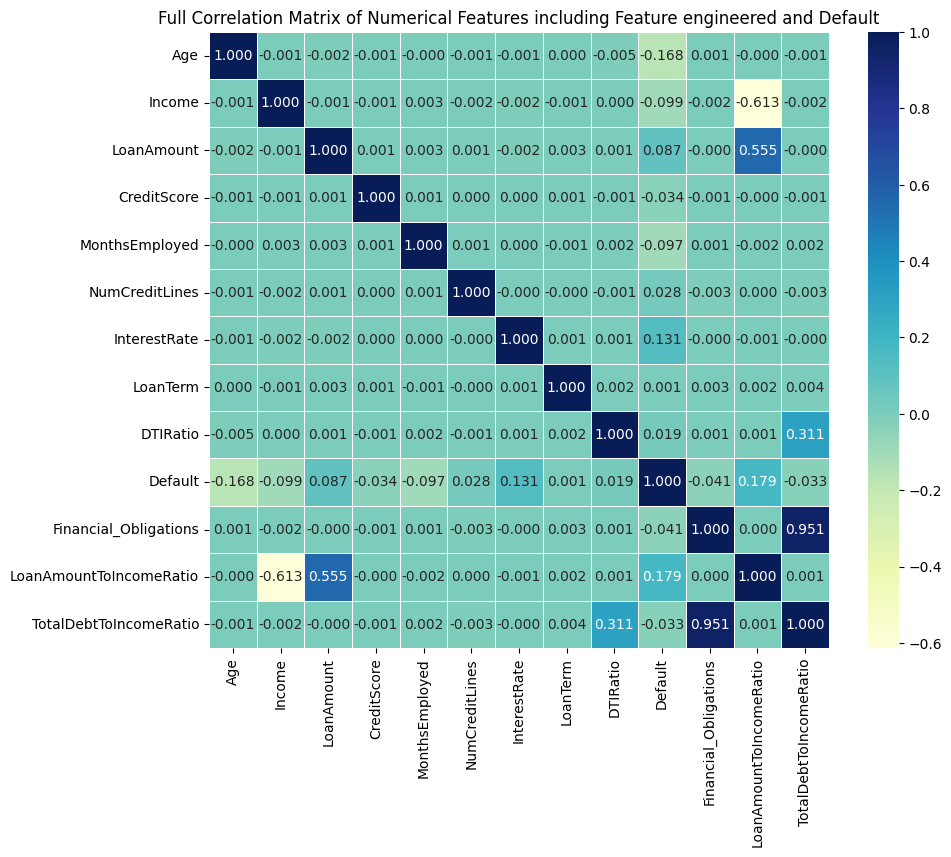

In [31]:
numerical_columns = loan_default_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calculate the full correlation matrix for all numerical features including 'Default'
full_correlation_matrix = loan_default_df[numerical_columns].corr()

# Plot the full correlation matrix heatmap with a blue-green-yellow color scheme
plt.figure(figsize=(10, 8))
sns.heatmap(
    full_correlation_matrix,
    annot=True,
    cmap='YlGnBu',  # Blue-Green-Yellow color palette
    fmt='.3f',
    linewidths=0.5,
    cbar=True
)
plt.title('Full Correlation Matrix of Numerical Features including Feature engineered and Default')
plt.show()

In [32]:
#drop the Loan ID column
loan_default_df.drop(['LoanID'], axis=1, inplace=True)
loan_default_df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Financial_Obligations,LoanAmountToIncomeRatio,TotalDebtToIncomeRatio
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,2,0.588262,2.44
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,0,2.467481,0.68
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,2,1.534154,2.31
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,0,1.412638,0.23
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,1,0.447179,1.73


In [33]:
# Split training and testing sets
# Create the features DataFrame, X
X = loan_default_df.copy()
X = X.drop(columns='Default')

# Create the target DataFrame, y
y = loan_default_df['Default']

# Use train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [34]:
# Review the X_train DataFrame
X_train

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Financial_Obligations,LoanAmountToIncomeRatio,TotalDebtToIncomeRatio
120619,63,15059,70015,739,87,3,18.43,48,0.62,PhD,Part-time,Single,No,Yes,Business,Yes,1,4.649379,1.62
86171,54,113722,162395,805,22,3,17.31,12,0.33,PhD,Unemployed,Single,No,Yes,Business,No,1,1.428000,1.33
10433,37,63953,19166,637,56,1,20.42,12,0.50,PhD,Unemployed,Divorced,Yes,No,Other,No,1,0.299689,1.50
121331,24,75686,27350,547,24,3,22.99,12,0.29,Master's,Part-time,Married,Yes,Yes,Education,No,2,0.361361,2.29
14129,45,24160,144568,446,73,2,20.10,12,0.26,Bachelor's,Self-employed,Single,No,Yes,Education,No,1,5.983775,1.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,40,116623,161673,651,79,2,23.44,12,0.87,Bachelor's,Part-time,Divorced,No,No,Home,Yes,0,1.386287,0.87
103694,67,62958,189499,460,77,3,9.29,36,0.11,Bachelor's,Self-employed,Single,No,No,Business,Yes,0,3.009927,0.11
131932,62,34372,59645,524,94,3,9.72,60,0.24,PhD,Full-time,Single,Yes,No,Auto,No,1,1.735279,1.24
146867,44,146262,198454,489,7,4,4.31,48,0.30,High School,Self-employed,Married,Yes,No,Home,No,1,1.356839,1.30


In [35]:
#Review the Y_train DataFrame
y_train

,Default
120619,0
86171,0
10433,0
121331,0
14129,0
...,...
119879,0
103694,0
131932,0
146867,0


# **Standard Scaling and Encoding**

In [36]:
# This is ordinal! Lets use the ordinal encoder
# We'll set any unknown values to -1
encode_education = OrdinalEncoder(categories=[["High School", "Bachelor's", "Master's", "PhD"]], handle_unknown='use_encoded_value', unknown_value=-1)

# Train the encoder
encode_education.fit(X_train['Education'].values.reshape(-1, 1))

OrdinalEncoder(categories=[['High School', "Bachelor's", "Master's", 'PhD']],
               handle_unknown='use_encoded_value', unknown_value=-1)

In [37]:
encode_employment_type = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Train the encoder
encode_employment_type.fit(X_train['EmploymentType'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [38]:
encode_marital_status = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Train the encoder
encode_marital_status.fit(X_train['MaritalStatus'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [39]:
encode_has_mortgage = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Train the encoder
encode_has_mortgage.fit(X_train['HasMortgage'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [40]:
encode_has_dependents = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Train the encoder
encode_has_dependents.fit(X_train['HasDependents'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [41]:
encode_loan_purpose = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Train the encoder
encode_loan_purpose.fit(X_train['LoanPurpose'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [42]:
encode_has_cosigner = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Train the encoder
encode_has_cosigner.fit(X_train['HasCoSigner'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [43]:
# Combine the encoders into a function
# Make sure to return a dataframe
def encode_categorical(X_data):
    # Separate numeric columns
    X_data_numeric = X_data.select_dtypes(include='number').reset_index(drop=True)

    # Multicolumn encoders first
    employment_type_feature_names = encode_employment_type.get_feature_names_out(['EmploymentType'])  # Pass the original column name to get_feature_names_out
    employment_type_encoded_df = pd.DataFrame(encode_employment_type.transform(X_data['EmploymentType'].values.reshape(-1, 1)), columns=employment_type_feature_names)

    marital_status_feature_names = encode_marital_status.get_feature_names_out(['MaritalStatus'])  # Pass the original column name to get_feature_names_out
    marital_status_encoded_df = pd.DataFrame(encode_marital_status.transform(X_data['MaritalStatus'].values.reshape(-1, 1)), columns=marital_status_feature_names)

    has_mortgage_feature_names = encode_has_mortgage.get_feature_names_out(['HasMortgage'])  # Pass the original column name to get_feature_names_out
    has_mortgage_encoded_df = pd.DataFrame(encode_has_mortgage.transform(X_data['HasMortgage'].values.reshape(-1, 1)), columns=has_mortgage_feature_names)

    has_dependents_feature_names = encode_has_dependents.get_feature_names_out(['HasDependents'])
    has_dependents_encoded_df = pd.DataFrame(encode_has_dependents.transform(X_data['HasDependents'].values.reshape(-1, 1)), columns=has_dependents_feature_names)

    loan_purpose_feature_names = encode_loan_purpose.get_feature_names_out(['LoanPurpose'])
    loan_purpose_encoded_df = pd.DataFrame(encode_loan_purpose.transform(X_data['LoanPurpose'].values.reshape(-1, 1)), columns=loan_purpose_feature_names)

    has_cosigner_feature_names = encode_has_cosigner.get_feature_names_out(['HasCoSigner'])
    encode_has_cosigner_df = pd.DataFrame(encode_has_cosigner.transform(X_data['HasCoSigner'].values.reshape(-1, 1)), columns=has_cosigner_feature_names)

    # Concat all dfs together
    dfs = [X_data_numeric, employment_type_encoded_df, has_mortgage_encoded_df, has_dependents_encoded_df, loan_purpose_encoded_df, encode_has_cosigner_df ]
    X_data_encoded = pd.concat(dfs, axis=1)

    # Add single column encoders
    X_data_encoded['Education'] = encode_education.transform(X_data['Education'].values.reshape(-1, 1))

    return X_data_encoded

In [44]:
# Apply the encoding function to both training and testing
X_train_encoded = encode_categorical(X_train)
X_test_encoded = encode_categorical(X_test)

In [45]:
X_train_encoded

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Financial_Obligations,...,EmploymentType_Self-employed,EmploymentType_Unemployed,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes,Education
0,63,15059,70015,739,87,3,18.43,48,0.62,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0
1,54,113722,162395,805,22,3,17.31,12,0.33,1,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0
2,37,63953,19166,637,56,1,20.42,12,0.50,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
3,24,75686,27350,547,24,3,22.99,12,0.29,2,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
4,45,24160,144568,446,73,2,20.10,12,0.26,1,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191505,40,116623,161673,651,79,2,23.44,12,0.87,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
191506,67,62958,189499,460,77,3,9.29,36,0.11,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
191507,62,34372,59645,524,94,3,9.72,60,0.24,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
191508,44,146262,198454,489,7,4,4.31,48,0.30,1,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [46]:
#List of numerical columns
numerical_columns_for_scaling = ['Age',	'Income',	'LoanAmount',	'CreditScore',	'MonthsEmployed',	'NumCreditLines',	'InterestRate',	'LoanTerm',	'DTIRatio', 'Financial_Obligations', 'LoanAmountToIncomeRatio', 'TotalDebtToIncomeRatio']

scaler = StandardScaler()

X_train_encoded[numerical_columns_for_scaling] = scaler.fit_transform(X_train_encoded[numerical_columns_for_scaling])

X_train_encoded


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Financial_Obligations,...,EmploymentType_Self-employed,EmploymentType_Unemployed,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes,Education
0,1.301608,-1.731092,-0.812414,1.038278,0.793405,0.445539,0.744737,0.707524,0.516287,-0.000118,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0
1,0.701131,0.801135,0.491486,1.453502,-1.082642,0.445539,0.575991,-1.417690,-0.739755,-0.000118,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0
2,-0.433104,-0.476207,-1.530123,0.396567,-0.101325,-1.344995,1.044564,-1.417690,-0.003455,-0.000118,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
3,-1.300459,-0.175075,-1.414610,-0.169649,-1.024917,0.445539,1.431778,-1.417690,-0.913002,1.413734,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
4,0.100654,-1.497512,0.239866,-0.805068,0.389334,-0.449728,0.996351,-1.417690,-1.042937,-0.000118,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191505,-0.232945,0.875590,0.481295,0.484645,0.562507,-0.449728,1.499578,-1.417690,1.599081,-1.413970,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
191506,1.568486,-0.501745,0.874046,-0.716991,0.504783,0.445539,-0.632357,-0.000880,-1.692613,-1.413970,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
191507,1.234888,-1.235416,-0.958781,-0.314348,0.995441,0.445539,-0.567570,1.415929,-1.129560,-0.000118,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
191508,0.033934,1.636287,1.000441,-0.534543,-1.515576,1.340807,-1.382678,0.707524,-0.869690,-0.000118,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [47]:
# Transforming the test dataset based on the fit from the training dataset
#X_test_scaled = scaler.transform(X_test)
#X_test_scaled

X_test_encoded[numerical_columns_for_scaling] = scaler.transform(X_test_encoded[numerical_columns_for_scaling])
X_test_encoded


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Financial_Obligations,...,EmploymentType_Self-employed,EmploymentType_Unemployed,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes,Education
0,0.767850,0.773775,-0.496559,0.044255,1.543824,-0.449728,1.514645,-0.000880,-1.519366,1.413734,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
1,0.834570,0.232569,0.056476,0.421732,-0.159049,-1.344995,0.256577,-1.417690,-0.306637,1.413734,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.167020,-0.111348,-0.736167,-0.031241,1.312926,0.445539,0.682964,-1.417690,-0.913002,1.413734,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0
3,-1.167020,-0.499820,-1.648148,-1.560023,1.688135,-1.344995,0.184257,-0.709285,-0.393260,-1.413970,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-1.300459,-1.356223,-1.501668,0.553849,1.226339,0.445539,0.230964,1.415929,0.819469,-0.000118,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63832,-0.299664,0.144254,-1.379860,-0.962351,-0.505397,-1.344995,0.833631,-0.000880,0.256416,-0.000118,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
63833,1.501767,1.519766,-0.879796,-0.509378,-0.187912,-1.344995,1.443831,-1.417690,-0.869690,-0.000118,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
63834,-0.433104,-1.319060,0.111029,-1.459362,-1.659887,0.445539,-1.458011,-0.709285,0.819469,-0.000118,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
63835,1.101449,-0.861112,-1.324813,-0.094153,-1.515576,0.445539,0.178230,-1.417690,-1.086249,-0.000118,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0


In [48]:
X_test_encoded['TotalDebtToIncomeRatio'].isnull().sum()

0

**Common Functions**

In [49]:
def display_confusion_matrix(y_test, y_pred, title):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    #how to interpret classification matrix
    tn, fp, fn, tp = cm.ravel()

    data = {'Metric': ['True Negatives', 'False Positives', 'False Negatives', 'True Positives'],
          'Count': [tn, fp, fn, tp]}

    df = pd.DataFrame(data)
    display(df)  # Display the DataFrame in Colab
    print("\n\n\n")

    # Create heatmaps for confusion matrices
    plt.figure(figsize=(16, 6))

    # Heatmap for the model trained on original data
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
    plt.title("Confusion Matrix (" + title +")")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

# Model and Fit the Data to a Logistic Regression

In [50]:
# Create a `LogisticRegression` function and assign it
# to a variable named `logistic_regression_model`.
logistic_regression_model = LogisticRegression(max_iter=1000)

In [51]:
# Fit the model
lr_model = logistic_regression_model.fit(X_train_encoded, y_train)

In [52]:
# Validate the model
print(f"Training Data Score: {lr_model.score(X_train_encoded, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test_encoded, y_test)}")

Training Data Score: 0.8865228969766592
Testing Data Score: 0.8870717608910194


In [53]:
# Make and save testing predictions with the saved logistic regression model using the test data
y_pred = lr_model.predict(X_test_encoded)

# Review the predictions
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, y_pred)

0.8870717608910194

,Metric,Count
0,True Negatives,56102
1,False Positives,308
2,False Negatives,6901
3,True Positives,526


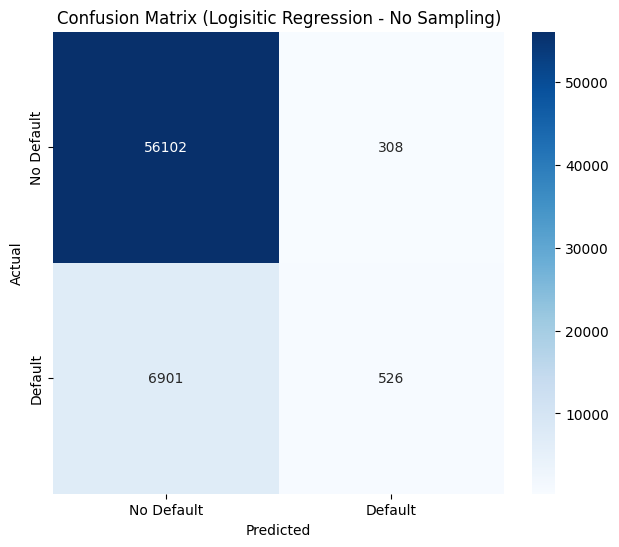

In [55]:
#classifcation matrix
#cm_lr = confusion_matrix(y_test, y_pred)
display_confusion_matrix(y_test, y_pred, "Logisitic Regression - No Sampling")

In [56]:
#Show classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     56410
           1       0.63      0.07      0.13      7427

    accuracy                           0.89     63837
   macro avg       0.76      0.53      0.53     63837
weighted avg       0.86      0.89      0.85     63837



In [57]:
# Import RandomUnderSampler from imblearn
from imblearn.under_sampling import RandomUnderSampler

# Instantiate a RandomUnderSampler instance
rus = RandomUnderSampler(random_state=1)

In [58]:
# Fit the training data to the random undersampler model
X_undersampled, y_undersampled = rus.fit_resample(X_train_encoded, y_train)

In [59]:
# Count distinct values for the resampled target data
y_undersampled.value_counts()

,count
Default,
0,22226
1,22226


In [60]:
logistic_regression_model_undersampled = LogisticRegression(max_iter=1000)

In [61]:
lr_model_undersampled = logistic_regression_model_undersampled.fit(X_undersampled, y_undersampled)

In [62]:
# Predict labels for oversampled testing features
y_pred_undersampled = lr_model_undersampled.predict(X_test_encoded)

,Metric,Count
0,True Negatives,39022
1,False Positives,17388
2,False Negatives,2307
3,True Positives,5120


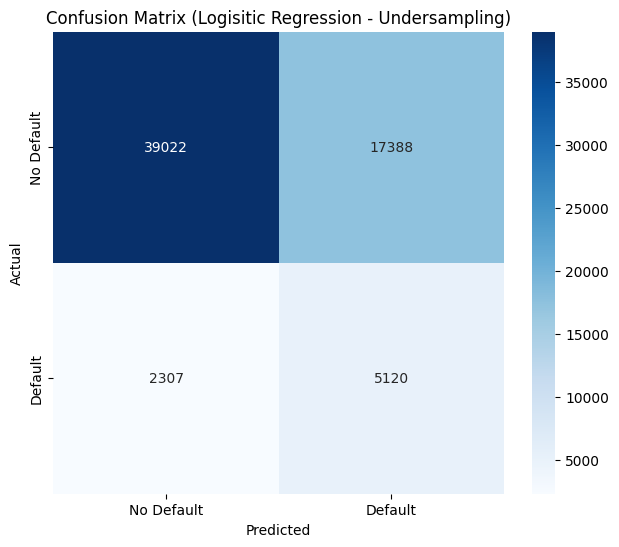

In [63]:
#confusion matrix with logistic regression and undersamping
display_confusion_matrix(y_test, y_pred_undersampled, "Logisitic Regression - Undersampling")

In [64]:
# Print classification reports
print(f"Classification Report - Logistic Regression - No Sampling")
print(classification_report(y_test, y_pred))
print("---------")
print(f"Classification Report - Logistic Regression - Undersampled Data")
print(classification_report(y_test, y_pred_undersampled))

Classification Report - Logistic Regression - No Sampling
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     56410
           1       0.63      0.07      0.13      7427

    accuracy                           0.89     63837
   macro avg       0.76      0.53      0.53     63837
weighted avg       0.86      0.89      0.85     63837

---------
Classification Report - Logistic Regression - Undersampled Data
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.23      0.69      0.34      7427

    accuracy                           0.69     63837
   macro avg       0.59      0.69      0.57     63837
weighted avg       0.86      0.69      0.75     63837



In [65]:
# Import RandomOverSampler from imblearn
from imblearn.over_sampling import RandomOverSampler

# Instantiate a RandomOversampler instance
ros = RandomOverSampler(random_state=1)

In [66]:
# Fit the training data to the `RandomOverSampler` model
X_oversampled, y_oversampled = ros.fit_resample(X_train_encoded, y_train)

In [67]:
# Count distinct values
y_oversampled.value_counts()

,count
Default,
0,169284
1,169284


In [68]:
logistic_regression_model_oversampled = LogisticRegression(max_iter=1000)

In [69]:
lr_model_oversampled = logistic_regression_model_oversampled.fit(X_oversampled, y_oversampled)

In [70]:
# Predict labels for oversampled testing features
y_pred_oversampled = lr_model_oversampled.predict(X_test_encoded)

,Metric,Count
0,True Negatives,39015
1,False Positives,17395
2,False Negatives,2323
3,True Positives,5104


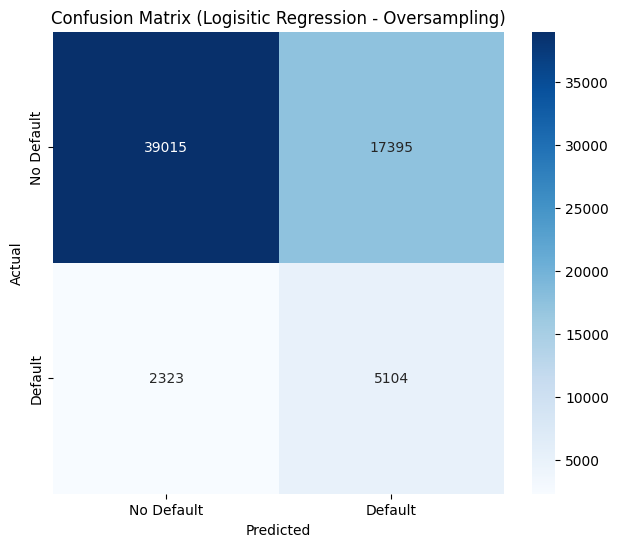

In [71]:
#confusion matrix with logistic regression and undersamping
display_confusion_matrix(y_test, y_pred_oversampled, "Logisitic Regression - Oversampling")

In [72]:
# Print classification reports
print(f"Classification Report - Logistic Regression - No Sampling")
print(classification_report(y_test, y_pred))
print("---------")
print(f"Classification Report - Logistic Regression - Undersampled Data")
print(classification_report(y_test, y_pred_undersampled))
print("---------")
print(f"Classification Report - Logistic Regression - Oversampled Data")
print(classification_report(y_test, y_pred_oversampled))

Classification Report - Logistic Regression - No Sampling
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     56410
           1       0.63      0.07      0.13      7427

    accuracy                           0.89     63837
   macro avg       0.76      0.53      0.53     63837
weighted avg       0.86      0.89      0.85     63837

---------
Classification Report - Logistic Regression - Undersampled Data
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.23      0.69      0.34      7427

    accuracy                           0.69     63837
   macro avg       0.59      0.69      0.57     63837
weighted avg       0.86      0.69      0.75     63837

---------
Classification Report - Logistic Regression - Oversampled Data
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.23      0.6

In [73]:
# Import SMOTE from imblearn
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE instance
# Set the sampling_strategy parameter equal to auto
smote_sampler = SMOTE(random_state=1, sampling_strategy='auto')

In [74]:
# Fit the training data to the smote_sampler model
X_resampled, y_resampled = smote_sampler.fit_resample(X_train_encoded, y_train)

In [75]:
# Count distinct values for the resampled target data
y_resampled.value_counts()

,count
Default,
0,169284
1,169284


In [76]:
smote_lr_model = LogisticRegression(max_iter=2000)

In [77]:
# Fit the resampled data to the new model
smote_lr_model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=2000)

In [78]:
# Predict labels for resampled testing features
smote_y_pred = smote_lr_model.predict(X_test_encoded)

,Metric,Count
0,True Negatives,39184
1,False Positives,17226
2,False Negatives,2355
3,True Positives,5072


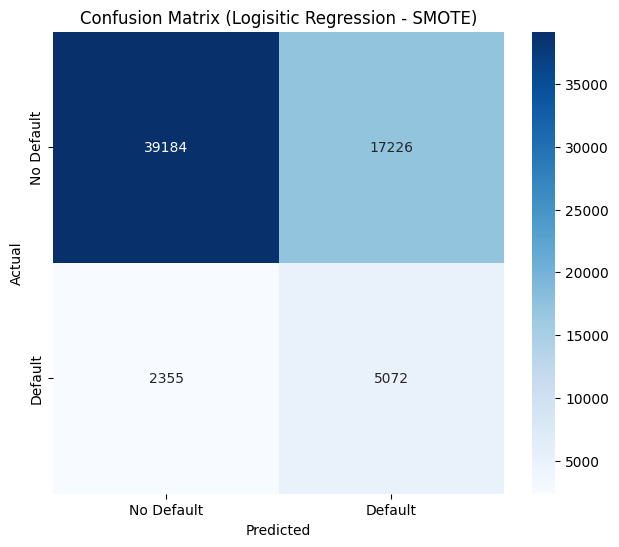

In [79]:
#confusion matrix with logistic regression and SMOTE
display_confusion_matrix(y_test, smote_y_pred, "Logisitic Regression - SMOTE")

In [80]:
# Print classification reports
print(f"Classification Report - Logistic Regression - No Sampling")
print(classification_report(y_test, y_pred))
print("---------")
print(f"Classification Report - Logistic Regression -Undersampled Data")
print(classification_report(y_test, y_pred_undersampled))
print("---------")
print(f"Classification Report - Logistic Regression - Oversampled Data")
print(classification_report(y_test, y_pred_oversampled))
print("---------")
print(f"Classification Report - Logistic Regression - SMOTE")
print(classification_report(y_test, smote_y_pred))

Classification Report - Logistic Regression - No Sampling
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     56410
           1       0.63      0.07      0.13      7427

    accuracy                           0.89     63837
   macro avg       0.76      0.53      0.53     63837
weighted avg       0.86      0.89      0.85     63837

---------
Classification Report - Logistic Regression -Undersampled Data
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.23      0.69      0.34      7427

    accuracy                           0.69     63837
   macro avg       0.59      0.69      0.57     63837
weighted avg       0.86      0.69      0.75     63837

---------
Classification Report - Logistic Regression - Oversampled Data
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.23      0.69

In [81]:
# Import SMOTEEN from imblearn
from imblearn.combine import SMOTEENN

# Instantiate the SMOTEENN instance
smote_enn = SMOTEENN(random_state=1)

In [82]:
# Fit the model to the training data
X_resampled, y_resampled = smote_enn.fit_resample(X_train_encoded, y_train)

In [83]:
y_resampled.value_counts()

,count
Default,
1,168599
0,94528


In [84]:
smoteenn_lr_model = LogisticRegression(max_iter=1000)

In [85]:
# Fit the resampled data to the new model
smoteenn_lr_model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000)

In [86]:
# Predict labels for resampled testing features
smoteenn_y_pred = smote_lr_model.predict(X_test_encoded)

,Metric,Count
0,True Negatives,39184
1,False Positives,17226
2,False Negatives,2355
3,True Positives,5072


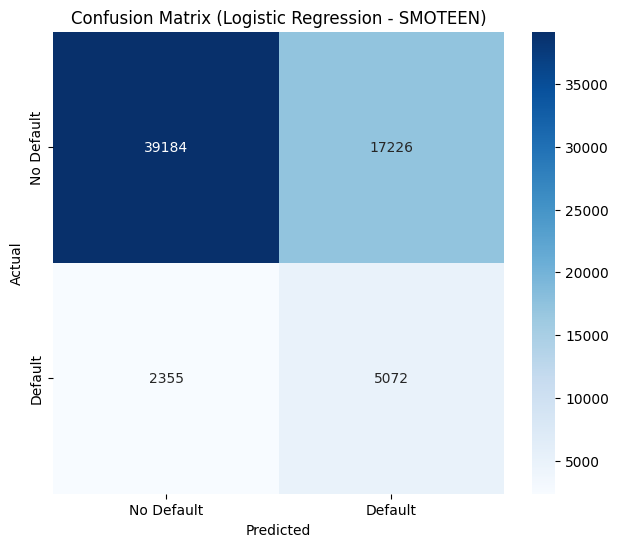

In [87]:
#create confusion matrix
display_confusion_matrix(y_test, smoteenn_y_pred, "Logistic Regression - SMOTEEN")

In [88]:
# Print classification reports
print(f"Classification Report - Logistic Regression - No Sampling")
print(classification_report(y_test, y_pred))
print("---------")
print(f"Classification Report - Logistic Regression - Undersampled Data")
print(classification_report(y_test, y_pred_undersampled))
print("---------")
print(f"Classification Report - Logistic Regression - Oversampled Data")
print(classification_report(y_test, y_pred_oversampled))
print("---------")
print(f"Classification Report - Logistic Regression - SMOTE")
print(classification_report(y_test, smote_y_pred))
print("---------")
print(f"Classification Report - Logistic Regression - SMOTEENN")
print(classification_report(y_test, smoteenn_y_pred))

Classification Report - Logistic Regression - No Sampling
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     56410
           1       0.63      0.07      0.13      7427

    accuracy                           0.89     63837
   macro avg       0.76      0.53      0.53     63837
weighted avg       0.86      0.89      0.85     63837

---------
Classification Report - Logistic Regression - Undersampled Data
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.23      0.69      0.34      7427

    accuracy                           0.69     63837
   macro avg       0.59      0.69      0.57     63837
weighted avg       0.86      0.69      0.75     63837

---------
Classification Report - Logistic Regression - Oversampled Data
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.23      0.6

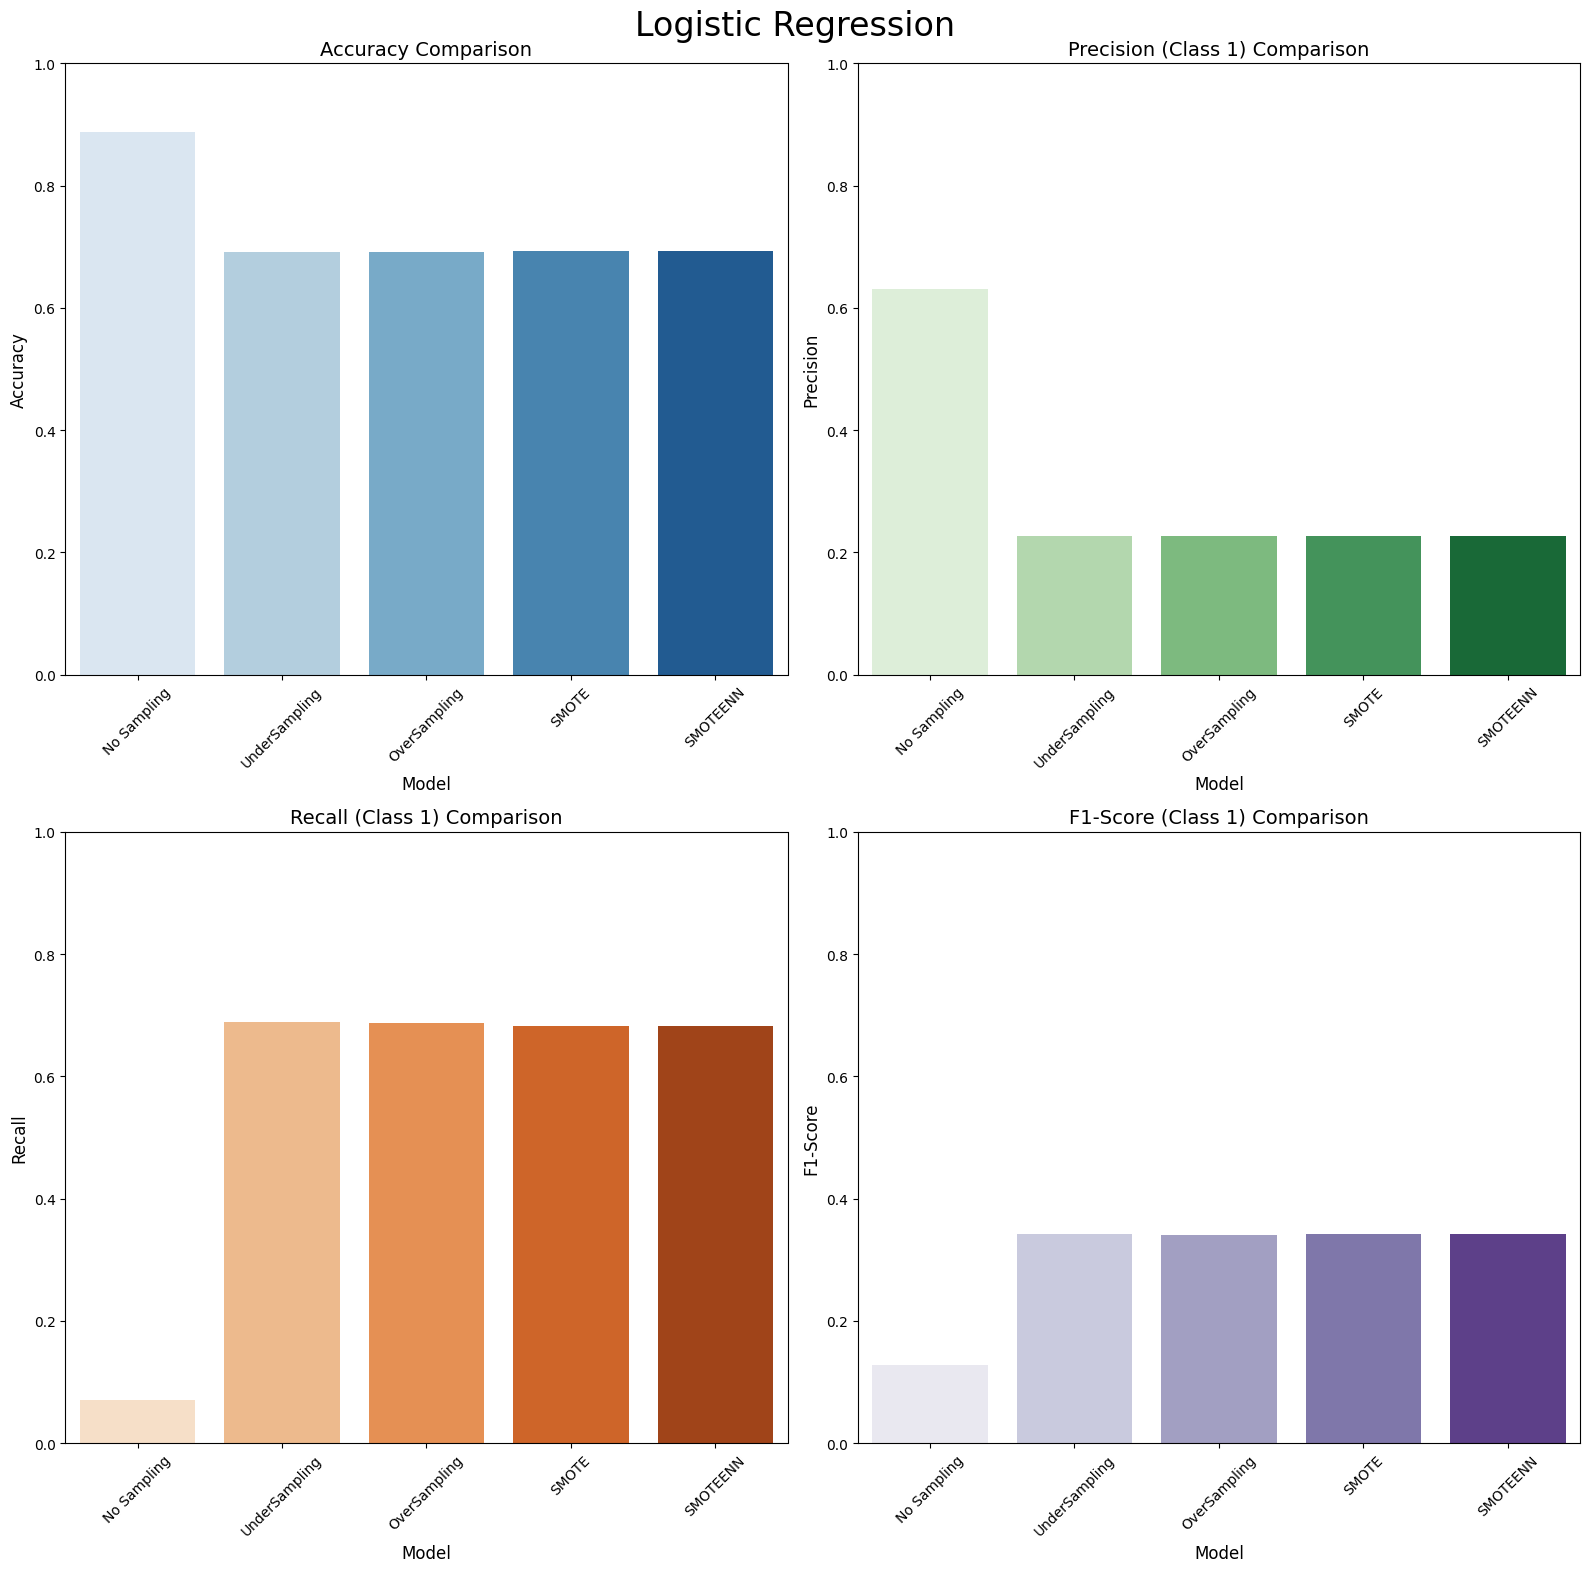

In [89]:
#Show Bar chart comparing metrics for Logistic Regression with different sampling techniques

# Reinitialize the results dictionary
results = {
    "Model": ["No Sampling", "UnderSampling", "OverSampling", "SMOTE", "SMOTEENN"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_undersampled),
        accuracy_score(y_test, y_pred_oversampled),
        accuracy_score(y_test, smote_y_pred),
        accuracy_score(y_test, smoteenn_y_pred)
    ],
    "Precision (Class 1)": [
        classification_report(y_test, y_pred, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_undersampled, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_oversampled, output_dict=True)['1']['precision'],
        classification_report(y_test, smote_y_pred, output_dict=True)['1']['precision'],
        classification_report(y_test, smoteenn_y_pred, output_dict=True)['1']['precision']
    ],
    "Recall (Class 1)": [
        classification_report(y_test, y_pred, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_undersampled, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_oversampled, output_dict=True)['1']['recall'],
        classification_report(y_test, smote_y_pred, output_dict=True)['1']['recall'],
        classification_report(y_test, smoteenn_y_pred, output_dict=True)['1']['recall'],
    ],
    "F1-Score (Class 1)": [
        classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_undersampled, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_oversampled, output_dict=True)['1']['f1-score'],
        classification_report(y_test, smote_y_pred, output_dict=True)['1']['f1-score'],
        classification_report(y_test, smoteenn_y_pred, output_dict=True)['1']['f1-score'],
    ]
}

# Convert to DataFrame and visualize
results_df = pd.DataFrame(results)

# Visualize results
#plt.figure(figsize=(16, 16))
fig, axes = plt.subplots(2, 2, figsize=(16, 16))  # Create subplots with fig and axes
fig.suptitle('Logistic Regression', fontsize=24)  # Add overall title

# Accuracy comparison
plt.subplot(2, 2, 1)
sns.barplot(data=results_df, x="Model", y="Accuracy", hue="Model", dodge=False, palette="Blues", legend=False)
plt.title("Accuracy Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Precision comparison
plt.subplot(2, 2, 2)
sns.barplot(data=results_df, x="Model", y="Precision (Class 1)", hue="Model", dodge=False, palette="Greens", legend=False)
plt.title("Precision (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Precision", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Recall comparison
plt.subplot(2, 2, 3)
sns.barplot(data=results_df, x="Model", y="Recall (Class 1)", hue="Model", dodge=False, palette="Oranges", legend=False)
plt.title("Recall (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Recall", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# F1-Score comparison
plt.subplot(2, 2, 4)
sns.barplot(data=results_df, x="Model", y="F1-Score (Class 1)", hue="Model", dodge=False, palette="Purples", legend=False)
plt.title("F1-Score (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("F1-Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()




# Model and Fit the Data to a RandomForestClassifier

In [90]:
#Model and fit to a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()   #RandomForestClassifier(n_estimators=100)

In [91]:
rf_model = random_forest_model.fit(X_train_encoded, y_train)

In [92]:
# Validate the model
print(f"Training Data Score: {rf_model.score(X_train_encoded, y_train)}")
print(f"Testing Data Score: {rf_model.score(X_test_encoded, y_test)}")

Training Data Score: 0.999958226724453
Testing Data Score: 0.885661920203017


In [93]:
# Make and save testing predictions with the saved random forest model using the test data
y_pred_rf = rf_model.predict(X_test_encoded)

# Review the predictions
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

In [94]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, y_pred_rf)

0.885661920203017

,Metric,Count
0,True Negatives,56210
1,False Positives,200
2,False Negatives,7099
3,True Positives,328


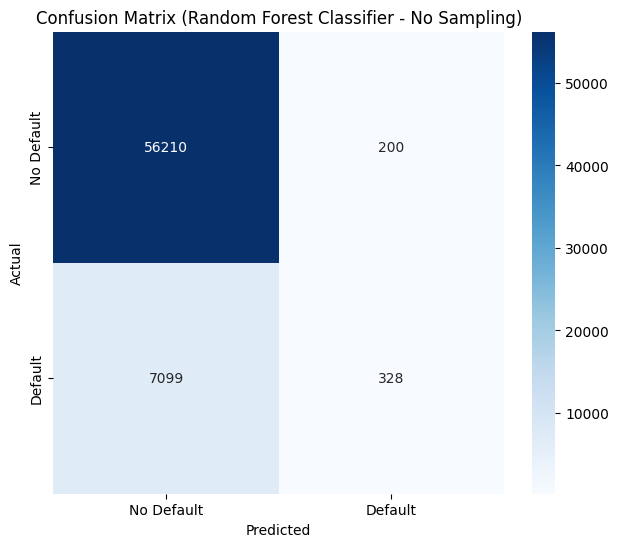

In [95]:
#classifcation matrix
display_confusion_matrix(y_test, y_pred_rf, "Random Forest Classifier - No Sampling")

In [96]:
#Show classification report
print(f"Classification Report - Random Forest - No Sampling")
print(classification_report(y_test, y_pred_rf))

Classification Report - Random Forest - No Sampling
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     56410
           1       0.62      0.04      0.08      7427

    accuracy                           0.89     63837
   macro avg       0.75      0.52      0.51     63837
weighted avg       0.86      0.89      0.84     63837



**UnderSampler**

In [97]:
# Import RandomUnderSampler from imblearn
from imblearn.under_sampling import RandomUnderSampler

# Instantiate a RandomUnderSampler instance
rus = RandomUnderSampler(random_state=1)

In [98]:
# Fit the training data to the random undersampler model
X_undersampled_us, y_undersampled_us = rus.fit_resample(X_train_encoded, y_train)

In [99]:
# Count distinct values for the resampled target data
y_undersampled_us.value_counts()

,count
Default,
0,22226
1,22226


In [100]:
undersample_rf_model = RandomForestClassifier()

In [101]:
undersample_rf_model.fit(X_undersampled_us, y_undersampled_us)

RandomForestClassifier()

In [102]:
# Predict labels for resampled testing features
undersample_y_pred_rf = undersample_rf_model.predict(X_test_encoded)

,Metric,Count
0,True Negatives,38992
1,False Positives,17418
2,False Negatives,2516
3,True Positives,4911


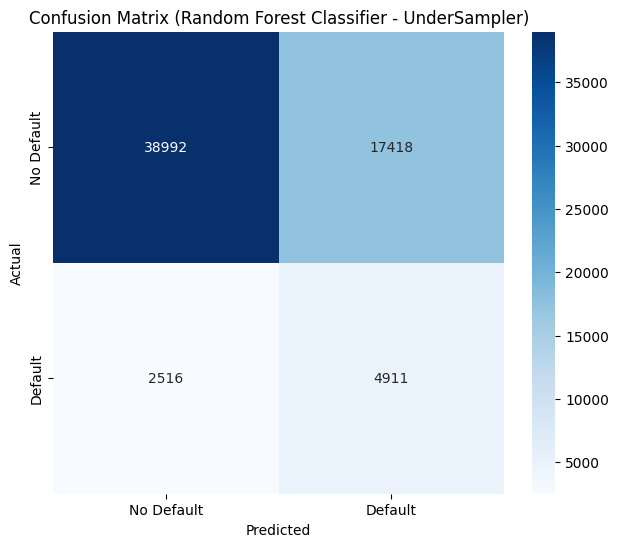

In [103]:
#classifcation matrix
display_confusion_matrix(y_test, undersample_y_pred_rf, "Random Forest Classifier - UnderSampler")

In [104]:
#Show classification report
print(f"Classification Report - Random Forest - No Sampling")
print(classification_report(y_test, y_pred_rf))
print("---------")
print(f"Classification Report - RandomForest - Undersampling")
print(classification_report(y_test, undersample_y_pred_rf))

Classification Report - Random Forest - No Sampling
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     56410
           1       0.62      0.04      0.08      7427

    accuracy                           0.89     63837
   macro avg       0.75      0.52      0.51     63837
weighted avg       0.86      0.89      0.84     63837

---------
Classification Report - RandomForest - Undersampling
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.22      0.66      0.33      7427

    accuracy                           0.69     63837
   macro avg       0.58      0.68      0.56     63837
weighted avg       0.86      0.69      0.74     63837



**OverSampler**

In [105]:
# Import RandomOverSampler from imblearn
from imblearn.over_sampling import RandomOverSampler

# Instantiate a RandomOversampler instance
ros = RandomOverSampler(random_state=1)

In [106]:
# Fit the training data to the `RandomOverSampler` model
X_oversampled_os, y_oversampled_os = ros.fit_resample(X_train_encoded, y_train)

In [107]:
# Count distinct values
y_oversampled_os.value_counts()

,count
Default,
0,169284
1,169284


In [108]:
oversample_rf_model = RandomForestClassifier()

In [109]:
oversample_rf_model.fit(X_oversampled_os, y_oversampled_os)

RandomForestClassifier()

In [110]:
# Predict labels for resampled testing features
oversample_y_pred_rf = undersample_rf_model.predict(X_test_encoded)

,Metric,Count
0,True Negatives,38992
1,False Positives,17418
2,False Negatives,2516
3,True Positives,4911


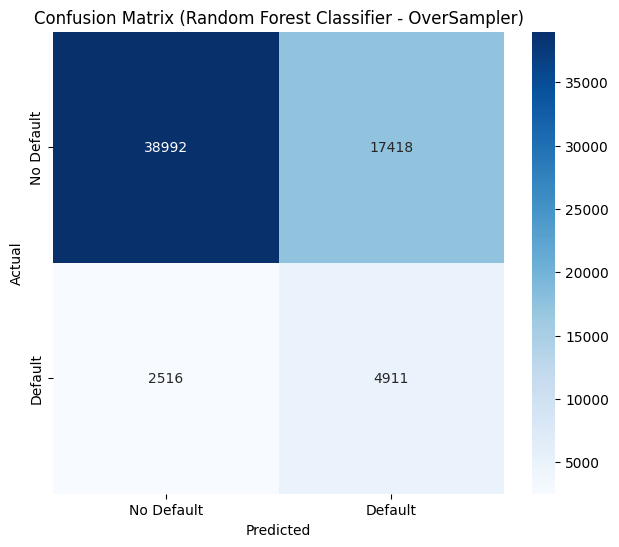

In [111]:
display_confusion_matrix(y_test, oversample_y_pred_rf, "Random Forest Classifier - OverSampler")

In [112]:
#Show classification reports
print(f"Classification Report - Random Forest - No Sampling")
print(classification_report(y_test, y_pred_rf))
print("---------")
print(f"Classification Report - RandomForest - Undersampling")
print(classification_report(y_test, undersample_y_pred_rf))
print("---------")
print(f"Classification Report - RandomForest - Oversampling")
print(classification_report(y_test, oversample_y_pred_rf ))

Classification Report - Random Forest - No Sampling
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     56410
           1       0.62      0.04      0.08      7427

    accuracy                           0.89     63837
   macro avg       0.75      0.52      0.51     63837
weighted avg       0.86      0.89      0.84     63837

---------
Classification Report - RandomForest - Undersampling
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.22      0.66      0.33      7427

    accuracy                           0.69     63837
   macro avg       0.58      0.68      0.56     63837
weighted avg       0.86      0.69      0.74     63837

---------
Classification Report - RandomForest - Oversampling
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.22      0.66      0.33      7427

    a

**SMOTE**

In [113]:
# Import SMOTE from imblearn
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE instance
# Set the sampling_strategy parameter equal to auto
smote_sampler = SMOTE(random_state=1, sampling_strategy='auto')

In [114]:
# Fit the training data to the smote_sampler model
X_resampled_rf, y_resampled_rf = smote_sampler.fit_resample(X_train_encoded, y_train)

In [115]:
# Count distinct values for the resampled target data
y_resampled_rf.value_counts()

,count
Default,
0,169284
1,169284


In [116]:
smote_rf_model = RandomForestClassifier()

In [117]:
# Fit the resampled data to the new model
smote_rf_model.fit(X_resampled_rf, y_resampled_rf)

RandomForestClassifier()

In [118]:
# Predict labels for resampled testing features
smote_y_pred_rf = smote_rf_model.predict(X_test_encoded)

,Metric,Count
0,True Negatives,55070
1,False Positives,1340
2,False Negatives,6451
3,True Positives,976


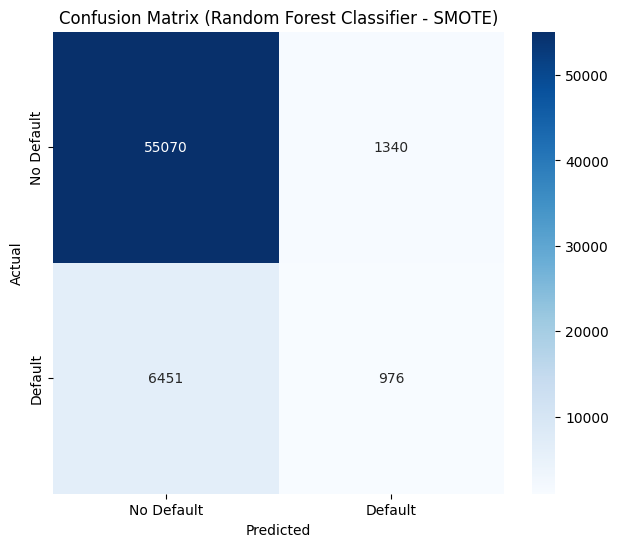

In [119]:
display_confusion_matrix(y_test, smote_y_pred_rf, "Random Forest Classifier - SMOTE")

In [120]:
#Show classification reports
print(f"Classification Report - Random Forest - No Sampling")
print(classification_report(y_test, y_pred_rf))
print("---------")
print(f"Classification Report - Random Forest - Undersampling")
print(classification_report(y_test, undersample_y_pred_rf))
print("---------")
print(f"Classification Report - Random Forest - Oversampling")
print(classification_report(y_test, oversample_y_pred_rf ))
print("---------")
print(f"Classification Report - Random Forest - SMOTE")
print(classification_report(y_test, smote_y_pred_rf))

Classification Report - Random Forest - No Sampling
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     56410
           1       0.62      0.04      0.08      7427

    accuracy                           0.89     63837
   macro avg       0.75      0.52      0.51     63837
weighted avg       0.86      0.89      0.84     63837

---------
Classification Report - Random Forest - Undersampling
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.22      0.66      0.33      7427

    accuracy                           0.69     63837
   macro avg       0.58      0.68      0.56     63837
weighted avg       0.86      0.69      0.74     63837

---------
Classification Report - Random Forest - Oversampling
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.22      0.66      0.33      7427

   

**SMOTE Sampling does not work well with Random Forest**

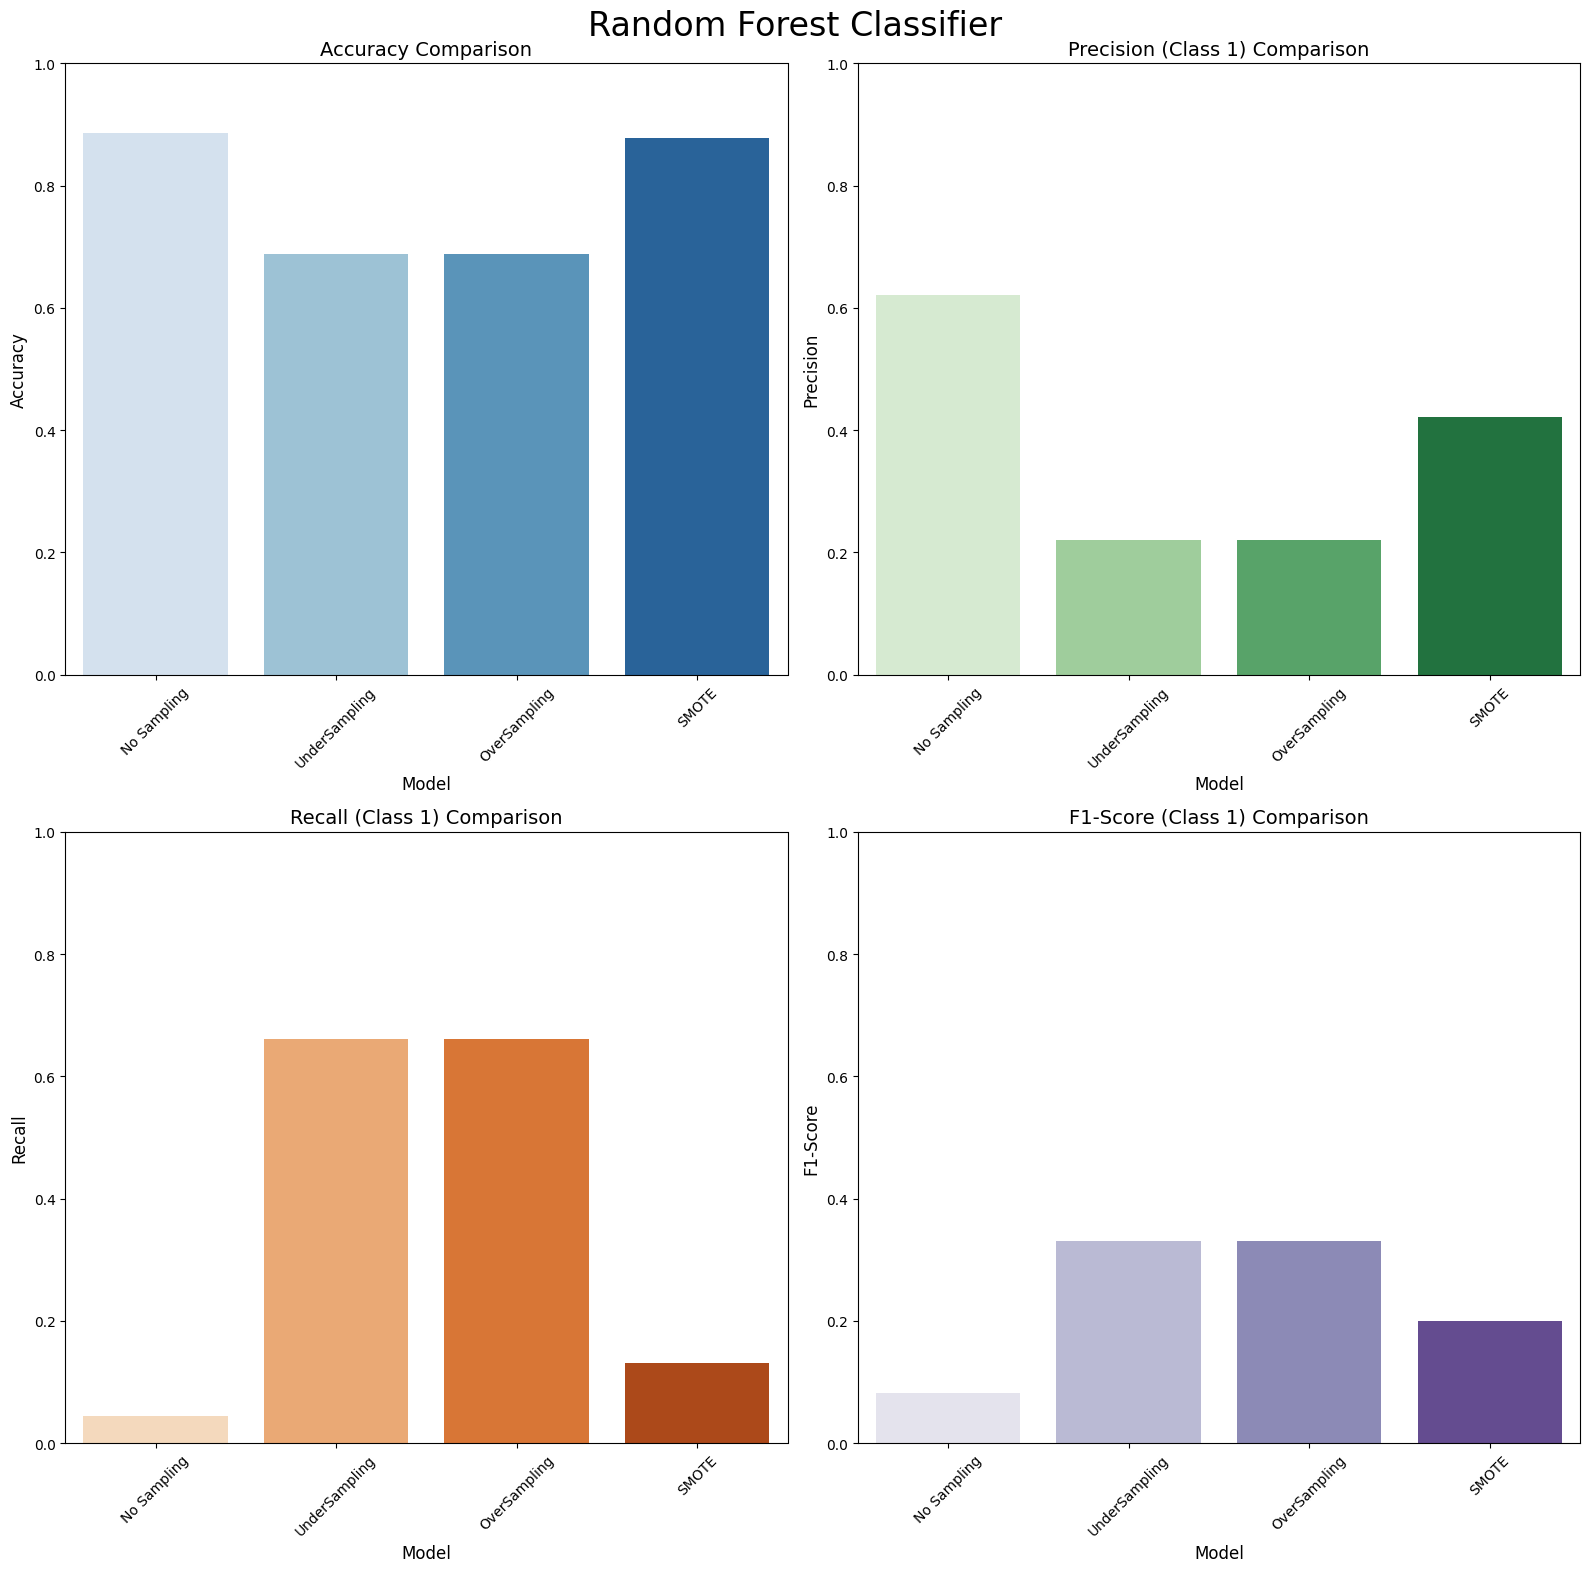

In [121]:
#Show Bar chart comparing metrics for Random Forest Classifier with different sampling techniques

# Reinitialize the results dictionary
results = {
    "Model": ["No Sampling", "UnderSampling", "OverSampling", "SMOTE"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, undersample_y_pred_rf),
        accuracy_score(y_test, oversample_y_pred_rf),
        accuracy_score(y_test, smote_y_pred_rf)
    ],
    "Precision (Class 1)": [
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision'],
        classification_report(y_test, undersample_y_pred_rf, output_dict=True)['1']['precision'],
        classification_report(y_test, oversample_y_pred_rf, output_dict=True)['1']['precision'],
        classification_report(y_test, smote_y_pred_rf, output_dict=True)['1']['precision']
    ],
    "Recall (Class 1)": [
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall'],
        classification_report(y_test, undersample_y_pred_rf, output_dict=True)['1']['recall'],
        classification_report(y_test, oversample_y_pred_rf, output_dict=True)['1']['recall'],
        classification_report(y_test, smote_y_pred_rf, output_dict=True)['1']['recall']
    ],
    "F1-Score (Class 1)": [
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score'],
        classification_report(y_test, undersample_y_pred_rf, output_dict=True)['1']['f1-score'],
        classification_report(y_test, oversample_y_pred_rf, output_dict=True)['1']['f1-score'],
        classification_report(y_test, smote_y_pred_rf, output_dict=True)['1']['f1-score']
    ]
}

# Convert to DataFrame and visualize
results_df = pd.DataFrame(results)

# Visualize results
#plt.figure(figsize=(16, 16))
fig, axes = plt.subplots(2, 2, figsize=(16, 16))  # Create subplots with fig and axes
fig.suptitle('Random Forest Classifier', fontsize=24)  # Add overall title


# Accuracy comparison
plt.subplot(2, 2, 1)
sns.barplot(data=results_df, x="Model", y="Accuracy", hue="Model", dodge=False, palette="Blues", legend=False)
plt.title("Accuracy Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Precision comparison
plt.subplot(2, 2, 2)
sns.barplot(data=results_df, x="Model", y="Precision (Class 1)", hue="Model", dodge=False, palette="Greens", legend=False)
plt.title("Precision (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Precision", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Recall comparison
plt.subplot(2, 2, 3)
sns.barplot(data=results_df, x="Model", y="Recall (Class 1)", hue="Model", dodge=False, palette="Oranges", legend=False)
plt.title("Recall (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Recall", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# F1-Score comparison
plt.subplot(2, 2, 4)
sns.barplot(data=results_df, x="Model", y="F1-Score (Class 1)", hue="Model", dodge=False, palette="Purples", legend=False)
plt.title("F1-Score (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("F1-Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

**DecisionTreeClassifier**

In [122]:
from sklearn.tree import DecisionTreeClassifier
# Create the decision tree classifier model
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train_encoded, y_train)

DecisionTreeClassifier()

In [123]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {dt_model.score(X_train_encoded, y_train)}")
print(f"Testing Data Score: {dt_model.score(X_test_encoded, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8015100960258158


In [124]:
# Make and save testing predictions with the saved random forest model using the test data
y_pred_dt = dt_model.predict(X_test_encoded)

# Review the predictions
y_pred_dt

array([0, 0, 0, ..., 0, 1, 0])

In [125]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, y_pred_dt)

0.8015100960258158

,Metric,Count
0,True Negatives,49450
1,False Positives,6960
2,False Negatives,5711
3,True Positives,1716


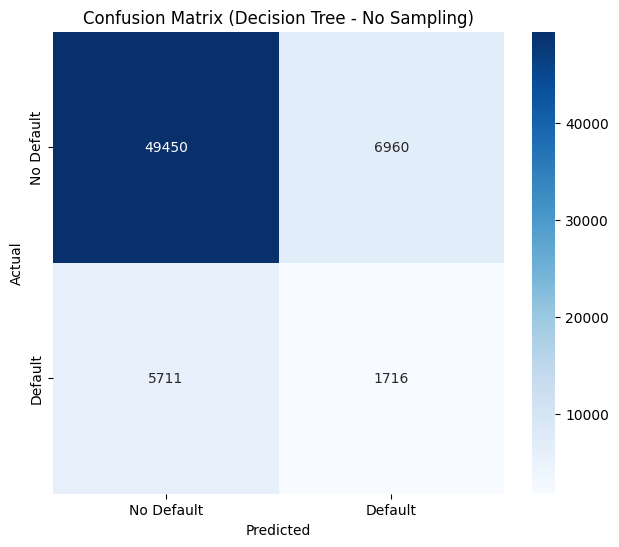

In [126]:
#classifcation matrix
display_confusion_matrix(y_test, y_pred_dt, "Decision Tree - No Sampling")

In [127]:
#Show classification report
print(f"Classification Report - Decision Tree - No Sampling")
print(classification_report(y_test, y_pred_dt))


Classification Report - Decision Tree - No Sampling
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     56410
           1       0.20      0.23      0.21      7427

    accuracy                           0.80     63837
   macro avg       0.55      0.55      0.55     63837
weighted avg       0.82      0.80      0.81     63837



**Undersampling**

In [128]:
# Import RandomUnderSampler from imblearn
from imblearn.under_sampling import RandomUnderSampler

# Instantiate a RandomUnderSampler instance
rus = RandomUnderSampler(random_state=1)

In [129]:
# Fit the training data to the random undersampler model
X_undersampled_us, y_undersampled_us = rus.fit_resample(X_train_encoded, y_train)

In [130]:
# Count distinct values for the resampled target data
y_undersampled_us.value_counts()

,count
Default,
0,22226
1,22226


In [131]:
undersample_dt_model = DecisionTreeClassifier()

In [132]:
undersample_dt_model.fit(X_undersampled_us, y_undersampled_us)

DecisionTreeClassifier()

In [133]:
# Predict labels for resampled testing features
undersample_y_pred_dt = undersample_rf_model.predict(X_test_encoded)

,Metric,Count
0,True Negatives,38992
1,False Positives,17418
2,False Negatives,2516
3,True Positives,4911


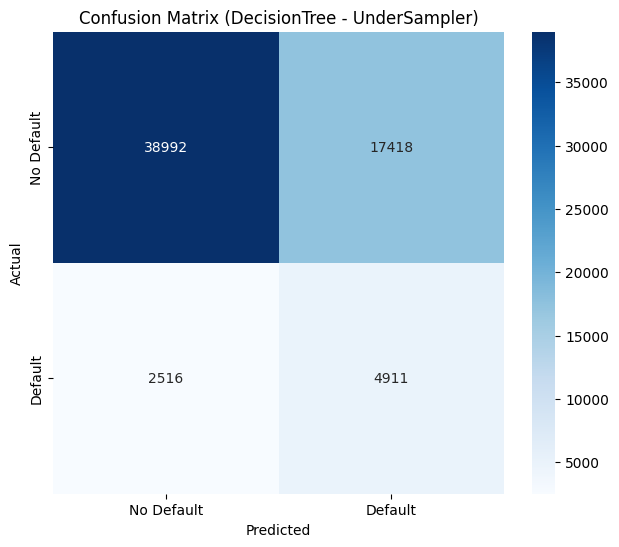

In [134]:
#classifcation matrix
display_confusion_matrix(y_test, undersample_y_pred_dt, "DecisionTree - UnderSampler")

In [135]:
#Show classification reports
print(f"Classification Report - Decision Tree - No Sampling")
print(classification_report(y_test, y_pred_dt))
print("---------")
print(f"Classification Report - DecisionTree - UnderSampler")
print(classification_report(y_test, undersample_y_pred_dt))



Classification Report - Decision Tree - No Sampling
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     56410
           1       0.20      0.23      0.21      7427

    accuracy                           0.80     63837
   macro avg       0.55      0.55      0.55     63837
weighted avg       0.82      0.80      0.81     63837

---------
Classification Report - DecisionTree - UnderSampler
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.22      0.66      0.33      7427

    accuracy                           0.69     63837
   macro avg       0.58      0.68      0.56     63837
weighted avg       0.86      0.69      0.74     63837



**Oversample**

In [136]:
# Import RandomOverSampler from imblearn
from imblearn.over_sampling import RandomOverSampler

# Instantiate a RandomOversampler instance
ros = RandomOverSampler(random_state=1)

In [137]:
# Fit the training data to the `RandomOverSampler` model
X_oversampled_os, y_oversampled_os = ros.fit_resample(X_train_encoded, y_train)

In [138]:
# Count distinct values
y_oversampled_os.value_counts()

,count
Default,
0,169284
1,169284


In [139]:
oversample_dt_model = DecisionTreeClassifier()

In [140]:
oversample_dt_model.fit(X_oversampled_os, y_oversampled_os)

DecisionTreeClassifier()

In [141]:
oversample_y_pred_dt = undersample_rf_model.predict(X_test_encoded)

,Metric,Count
0,True Negatives,38992
1,False Positives,17418
2,False Negatives,2516
3,True Positives,4911


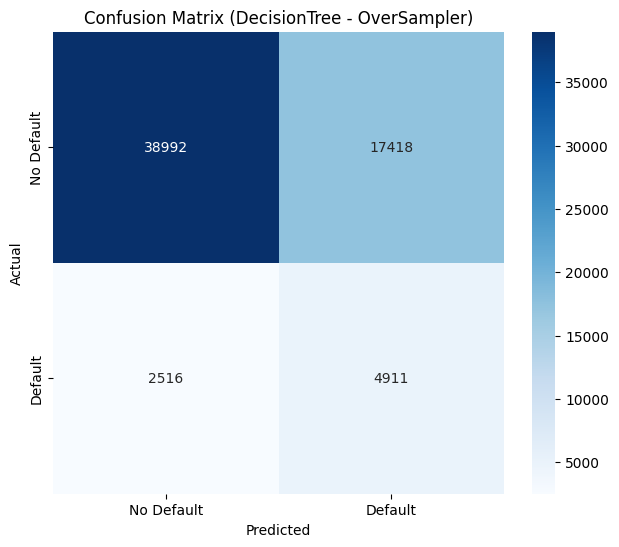

In [142]:
#classifcation matrix
display_confusion_matrix(y_test, oversample_y_pred_dt, "DecisionTree - OverSampler")

In [143]:
#Show classification Reports

print(f"Classification Report - Decision Tree - No Sampling")
print(classification_report(y_test, y_pred_dt))
print("---------")
print(f"Classification Report - DecisionTree - Undersampling")
print(classification_report(y_test, undersample_y_pred_dt))
print("---------")
print(f"Classification Report - DecisionTree - Oversampling")
print(classification_report(y_test, oversample_y_pred_dt))


Classification Report - Decision Tree - No Sampling
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     56410
           1       0.20      0.23      0.21      7427

    accuracy                           0.80     63837
   macro avg       0.55      0.55      0.55     63837
weighted avg       0.82      0.80      0.81     63837

---------
Classification Report - DecisionTree - Undersampling
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.22      0.66      0.33      7427

    accuracy                           0.69     63837
   macro avg       0.58      0.68      0.56     63837
weighted avg       0.86      0.69      0.74     63837

---------
Classification Report - DecisionTree - Oversampling
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.22      0.66      0.33      7427

    a

**SMOTE**

In [144]:
# Import SMOTE from imblearn
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE instance
# Set the sampling_strategy parameter equal to auto
smote_sampler = SMOTE(random_state=1, sampling_strategy='auto')

In [145]:
# Fit the training data to the smote_sampler model
X_resampled_rf, y_resampled_rf = smote_sampler.fit_resample(X_train_encoded, y_train)

In [146]:
# Count distinct values for the resampled target data
y_resampled_rf.value_counts()

,count
Default,
0,169284
1,169284


In [147]:
smote_rf_model = DecisionTreeClassifier()

In [148]:
smote_rf_model.fit(X_resampled_rf, y_resampled_rf)

DecisionTreeClassifier()

In [149]:
smote_y_pred_dt = smote_rf_model.predict(X_test_encoded)

,Metric,Count
0,True Negatives,47804
1,False Positives,8606
2,False Negatives,5441
3,True Positives,1986


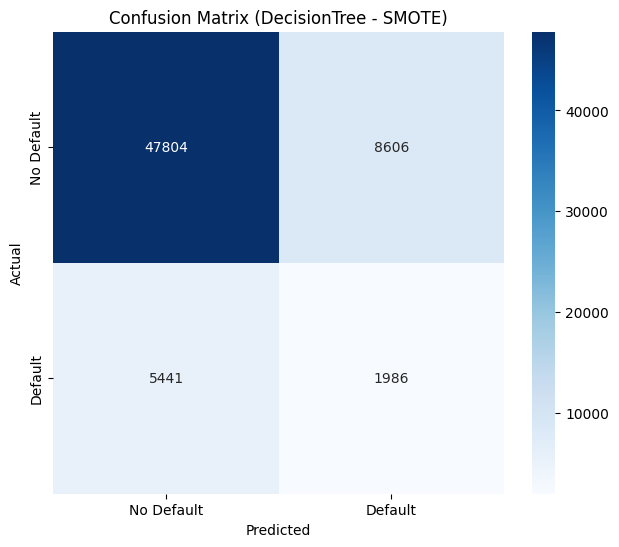

In [150]:
#classifcation matrix
display_confusion_matrix(y_test, smote_y_pred_dt, "DecisionTree - SMOTE")

In [151]:
#Show Classification Reports
print(f"Classification Report - Decision Tree - No Sampling")
print(classification_report(y_test, y_pred_dt))
print("---------")
print(f"Classification Report - DecisionTree - Undersampling")
print(classification_report(y_test, undersample_y_pred_dt))
print("---------")
print(f"Classification Report - DecisionTree - Oversampling")
print(classification_report(y_test, oversample_y_pred_dt))
print("---------")
print(f"Classification Report - DecisionTree - SMOTE")
print(classification_report(y_test, smote_y_pred_dt))

Classification Report - Decision Tree - No Sampling
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     56410
           1       0.20      0.23      0.21      7427

    accuracy                           0.80     63837
   macro avg       0.55      0.55      0.55     63837
weighted avg       0.82      0.80      0.81     63837

---------
Classification Report - DecisionTree - Undersampling
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.22      0.66      0.33      7427

    accuracy                           0.69     63837
   macro avg       0.58      0.68      0.56     63837
weighted avg       0.86      0.69      0.74     63837

---------
Classification Report - DecisionTree - Oversampling
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.22      0.66      0.33      7427

    a

**Note:  SMOTE does not seem to work well with DecisionTree model**

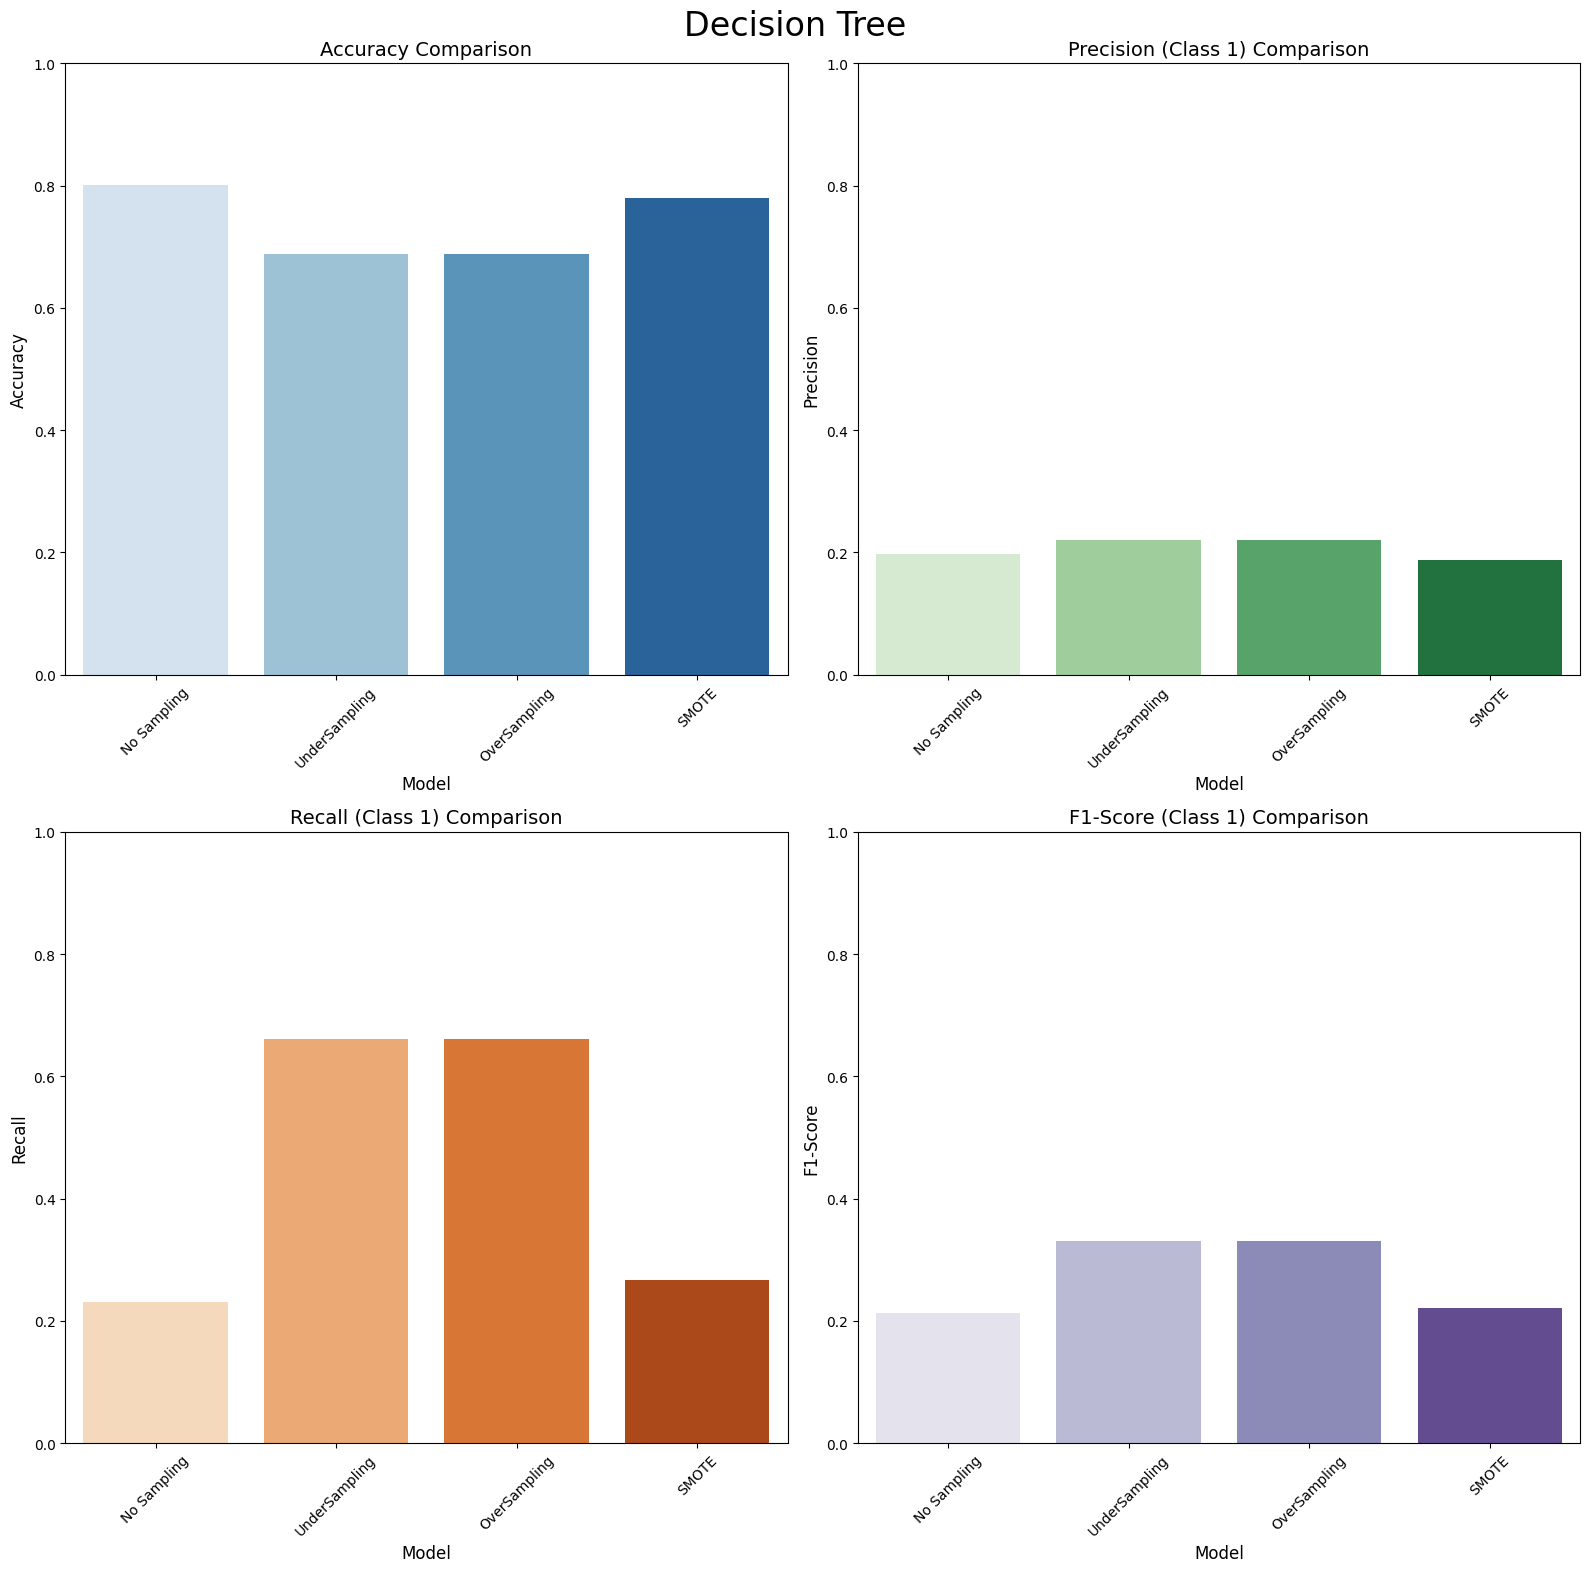

In [152]:
#Show Bar chart comparing metrics for Decision Tree with different sampling techniques

# Reinitialize the results dictionary
results = {
    "Model": ["No Sampling", "UnderSampling", "OverSampling", "SMOTE"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, undersample_y_pred_dt),
        accuracy_score(y_test, oversample_y_pred_dt),
        accuracy_score(y_test, smote_y_pred_dt)
    ],
    "Precision (Class 1)": [
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['precision'],
        classification_report(y_test, undersample_y_pred_dt, output_dict=True)['1']['precision'],
        classification_report(y_test, oversample_y_pred_dt, output_dict=True)['1']['precision'],
        classification_report(y_test, smote_y_pred_dt, output_dict=True)['1']['precision']
    ],
    "Recall (Class 1)": [
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['recall'],
        classification_report(y_test, undersample_y_pred_rf, output_dict=True)['1']['recall'],
        classification_report(y_test, oversample_y_pred_rf, output_dict=True)['1']['recall'],
        classification_report(y_test, smote_y_pred_dt, output_dict=True)['1']['recall']
    ],
    "F1-Score (Class 1)": [
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['f1-score'],
        classification_report(y_test, undersample_y_pred_dt, output_dict=True)['1']['f1-score'],
        classification_report(y_test, oversample_y_pred_dt, output_dict=True)['1']['f1-score'],
        classification_report(y_test, smote_y_pred_dt, output_dict=True)['1']['f1-score']
    ]
}

# Convert to DataFrame and visualize
results_df = pd.DataFrame(results)

# Visualize results
#plt.figure(figsize=(16, 16))
fig, axes = plt.subplots(2, 2, figsize=(16, 16))  # Create subplots with fig and axes
fig.suptitle('Decision Tree', fontsize=24)  # Add overall title


# Accuracy comparison
plt.subplot(2, 2, 1)
sns.barplot(data=results_df, x="Model", y="Accuracy", hue="Model", dodge=False, palette="Blues", legend=False)
plt.title("Accuracy Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Precision comparison
plt.subplot(2, 2, 2)
sns.barplot(data=results_df, x="Model", y="Precision (Class 1)", hue="Model", dodge=False, palette="Greens", legend=False)
plt.title("Precision (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Precision", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Recall comparison
plt.subplot(2, 2, 3)
sns.barplot(data=results_df, x="Model", y="Recall (Class 1)", hue="Model", dodge=False, palette="Oranges", legend=False)
plt.title("Recall (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Recall", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# F1-Score comparison
plt.subplot(2, 2, 4)
sns.barplot(data=results_df, x="Model", y="F1-Score (Class 1)", hue="Model", dodge=False, palette="Purples", legend=False)
plt.title("F1-Score (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("F1-Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

**KNN Model**

In [153]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_encoded, y_train)
    train_score = knn.score(X_train_encoded, y_train)
    test_score = knn.score(X_test_encoded, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")



k: 1, Train/Test Score: 1.000/0.815
k: 3, Train/Test Score: 0.909/0.861
k: 5, Train/Test Score: 0.896/0.874
k: 7, Train/Test Score: 0.892/0.880
k: 9, Train/Test Score: 0.890/0.882


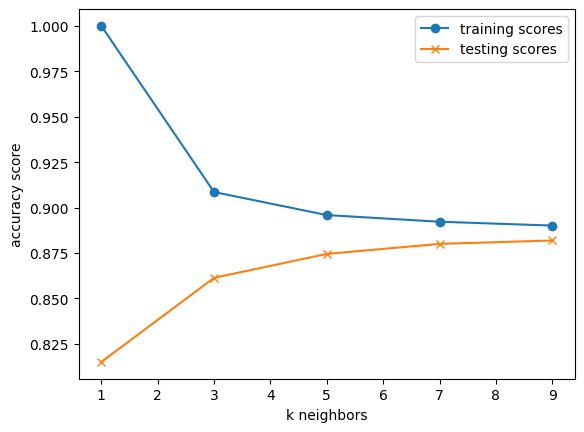

In [154]:
# Plot the results
plt.plot(range(1, 10, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 10, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [155]:
# Create the KNN model with 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn_model.fit(X_train_encoded, y_train)

KNeighborsClassifier()

In [156]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {knn_model.score(X_train_encoded, y_train)}")
print(f"Testing Data Score: {knn_model.score(X_test_encoded, y_test)}")

Training Data Score: 0.8958435590830766
Testing Data Score: 0.8744615191816658


In [157]:
# Make and save testing predictions with the saved random forest model using the test data
y_pred_knn = knn_model.predict(X_test_encoded)

# Review the predictions
y_pred_knn

array([0, 0, 0, ..., 1, 0, 0])

In [158]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, y_pred_knn)

0.8744615191816658

,Metric,Count
0,True Negatives,55164
1,False Positives,1246
2,False Negatives,6768
3,True Positives,659


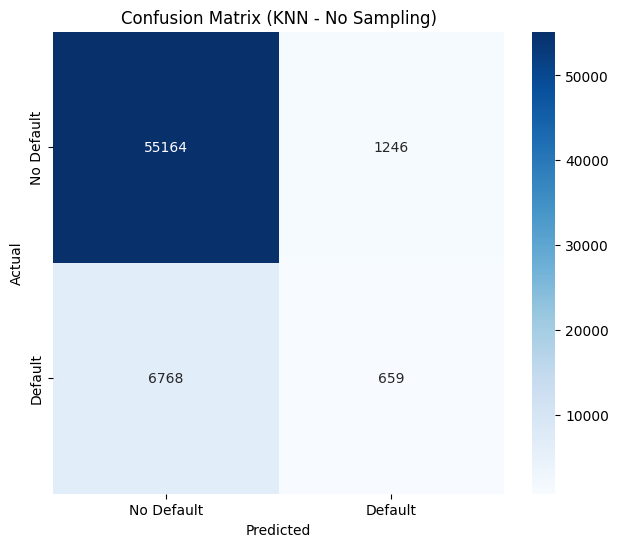

In [159]:
#classifcation matrix
display_confusion_matrix(y_test, y_pred_knn, "KNN - No Sampling")

In [160]:
#Show Classification Reports
print(f"Classification Report - KNN - No Sampling")
print(classification_report(y_test, y_pred_knn))

Classification Report - KNN - No Sampling
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     56410
           1       0.35      0.09      0.14      7427

    accuracy                           0.87     63837
   macro avg       0.62      0.53      0.54     63837
weighted avg       0.83      0.87      0.84     63837



**UnderSampling**

In [161]:
# Import RandomUnderSampler from imblearn
from imblearn.under_sampling import RandomUnderSampler

# Instantiate a RandomUnderSampler instance
rus = RandomUnderSampler(random_state=1)

In [162]:
# Fit the training data to the random undersampler model
X_undersampled_us, y_undersampled_us = rus.fit_resample(X_train_encoded, y_train)

In [163]:
# Count distinct values for the resampled target data
y_undersampled_us.value_counts()

,count
Default,
0,22226
1,22226


In [164]:
# Create the KNN model with 5 neighbors
knn_model_us = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn_model_us.fit(X_undersampled_us, y_undersampled_us)

KNeighborsClassifier()

In [165]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {knn_model_us.score(X_train_encoded, y_train)}")
print(f"Testing Data Score: {knn_model_us.score(X_test_encoded, y_test)}")

Training Data Score: 0.6575218004281761
Testing Data Score: 0.6260632548522017


In [166]:
# Make and save testing predictions with the saved random forest model using the test data
y_pred_knn_us = knn_model_us.predict(X_test_encoded)

# Review the predictions
y_pred_knn_us

array([0, 0, 0, ..., 1, 0, 0])

In [167]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, y_pred_knn_us)

0.6260632548522017

,Metric,Count
0,True Negatives,35306
1,False Positives,21104
2,False Negatives,2767
3,True Positives,4660


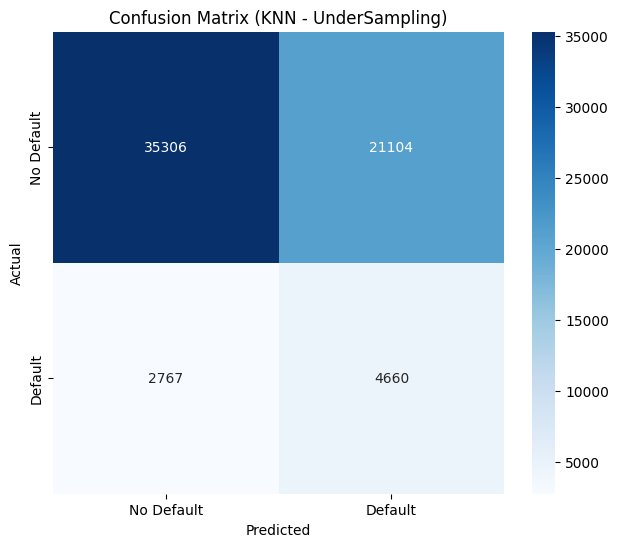

In [168]:
#classifcation matrix
display_confusion_matrix(y_test, y_pred_knn_us, "KNN - UnderSampling")

In [169]:
#Show Classification Reports
print(f"Classification Report - KNN - No Sampling")
print(classification_report(y_test, y_pred_knn))
print("---------")
print(f"Classification Report - KNN - UnderSampling")
print(classification_report(y_test, y_pred_knn_us))


Classification Report - KNN - No Sampling
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     56410
           1       0.35      0.09      0.14      7427

    accuracy                           0.87     63837
   macro avg       0.62      0.53      0.54     63837
weighted avg       0.83      0.87      0.84     63837

---------
Classification Report - KNN - UnderSampling
              precision    recall  f1-score   support

           0       0.93      0.63      0.75     56410
           1       0.18      0.63      0.28      7427

    accuracy                           0.63     63837
   macro avg       0.55      0.63      0.51     63837
weighted avg       0.84      0.63      0.69     63837



**OverSampling**

In [170]:
# Import RandomOverSampler from imblearn
from imblearn.over_sampling import RandomOverSampler

# Instantiate a RandomOversampler instance
ros = RandomOverSampler(random_state=1)

In [171]:
# Fit the training data to the `RandomOverSampler` model
X_oversampled_os, y_oversampled_os = ros.fit_resample(X_train_encoded, y_train)

In [172]:
# Count distinct values
y_oversampled_os.value_counts()

,count
Default,
0,169284
1,169284


In [173]:
# Create the KNN model with 5 neighbors
knn_model_os = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn_model_os.fit(X_oversampled_os, y_oversampled_os)

KNeighborsClassifier()

In [174]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {knn_model_os.score(X_train_encoded, y_train)}")
print(f"Testing Data Score: {knn_model_os.score(X_test_encoded, y_test)}")

Training Data Score: 0.8362069865803352
Testing Data Score: 0.7054842802763288


In [175]:
# Make and save testing predictions with the saved random forest model using the test data
y_pred_knn_os = knn_model_os.predict(X_test_encoded)

# Review the predictions
y_pred_knn_os

array([0, 0, 0, ..., 1, 0, 0])

In [176]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, y_pred_knn_os)

0.7054842802763288

,Metric,Count
0,True Negatives,41784
1,False Positives,14626
2,False Negatives,4175
3,True Positives,3252


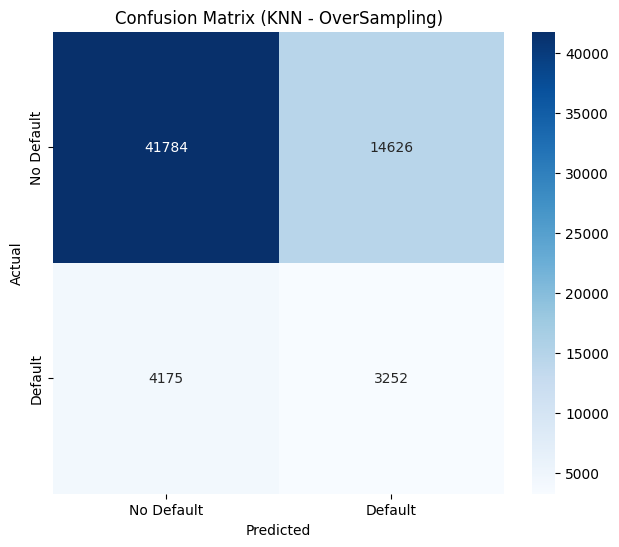

In [177]:
#classifcation matrix
display_confusion_matrix(y_test, y_pred_knn_os, "KNN - OverSampling")

In [178]:
#Show Classification Reports
print(f"Classification Report - KNN - No Sampling")
print(classification_report(y_test, y_pred_knn))
print("---------")
print(f"Classification Report - KNN - UnderSampling")
print(classification_report(y_test, y_pred_knn_us))
print("---------")
print(f"Classification Report - KNN - Oversampling")
print(classification_report(y_test, y_pred_knn_os))


Classification Report - KNN - No Sampling
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     56410
           1       0.35      0.09      0.14      7427

    accuracy                           0.87     63837
   macro avg       0.62      0.53      0.54     63837
weighted avg       0.83      0.87      0.84     63837

---------
Classification Report - KNN - UnderSampling
              precision    recall  f1-score   support

           0       0.93      0.63      0.75     56410
           1       0.18      0.63      0.28      7427

    accuracy                           0.63     63837
   macro avg       0.55      0.63      0.51     63837
weighted avg       0.84      0.63      0.69     63837

---------
Classification Report - KNN - Oversampling
              precision    recall  f1-score   support

           0       0.91      0.74      0.82     56410
           1       0.18      0.44      0.26      7427

    accuracy                     

**SMOTE**

In [179]:
# Import SMOTE from imblearn
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE instance
# Set the sampling_strategy parameter equal to auto
smote_sampler = SMOTE(random_state=1, sampling_strategy='auto')

In [180]:
# Fit the training data to the smote_sampler model
X_resampled_rf, y_resampled_rf = smote_sampler.fit_resample(X_train_encoded, y_train)

In [181]:
y_resampled_rf.value_counts()

,count
Default,
0,169284
1,169284


In [182]:
# Create the KNN model with 5 neighbors
knn_model_smote= KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn_model_smote.fit(X_oversampled_os, y_oversampled_os)

KNeighborsClassifier()

In [183]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {knn_model_smote.score(X_train_encoded, y_train)}")
print(f"Testing Data Score: {knn_model_smote.score(X_test_encoded, y_test)}")

Training Data Score: 0.8362069865803352
Testing Data Score: 0.7054842802763288


In [184]:
# Make and save testing predictions with the saved random forest model using the test data
y_pred_knn_smote = knn_model_smote.predict(X_test_encoded)

# Review the predictions
y_pred_knn_smote

array([0, 0, 0, ..., 1, 0, 0])

In [185]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, y_pred_knn_smote)

0.7054842802763288

,Metric,Count
0,True Negatives,41784
1,False Positives,14626
2,False Negatives,4175
3,True Positives,3252


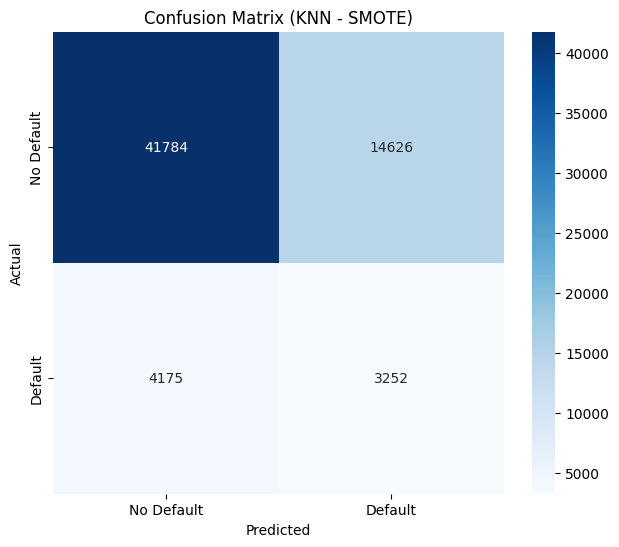

In [186]:
#classifcation matrix
display_confusion_matrix(y_test, y_pred_knn_smote, "KNN - SMOTE")

In [187]:
#Show Classification Reports
print(f"Classification Report - KNN - No Sampling")
print(classification_report(y_test, y_pred_knn))
print("---------")
print(f"Classification Report - KNN - UnderSampling")
print(classification_report(y_test, y_pred_knn_us))
print("---------")
print(f"Classification Report - KNN - Oversampling")
print(classification_report(y_test, y_pred_knn_os))
print("---------")
print(f"Classification Report - KNN - SMOTE")
print(classification_report(y_test, y_pred_knn_smote))



Classification Report - KNN - No Sampling
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     56410
           1       0.35      0.09      0.14      7427

    accuracy                           0.87     63837
   macro avg       0.62      0.53      0.54     63837
weighted avg       0.83      0.87      0.84     63837

---------
Classification Report - KNN - UnderSampling
              precision    recall  f1-score   support

           0       0.93      0.63      0.75     56410
           1       0.18      0.63      0.28      7427

    accuracy                           0.63     63837
   macro avg       0.55      0.63      0.51     63837
weighted avg       0.84      0.63      0.69     63837

---------
Classification Report - KNN - Oversampling
              precision    recall  f1-score   support

           0       0.91      0.74      0.82     56410
           1       0.18      0.44      0.26      7427

    accuracy                     

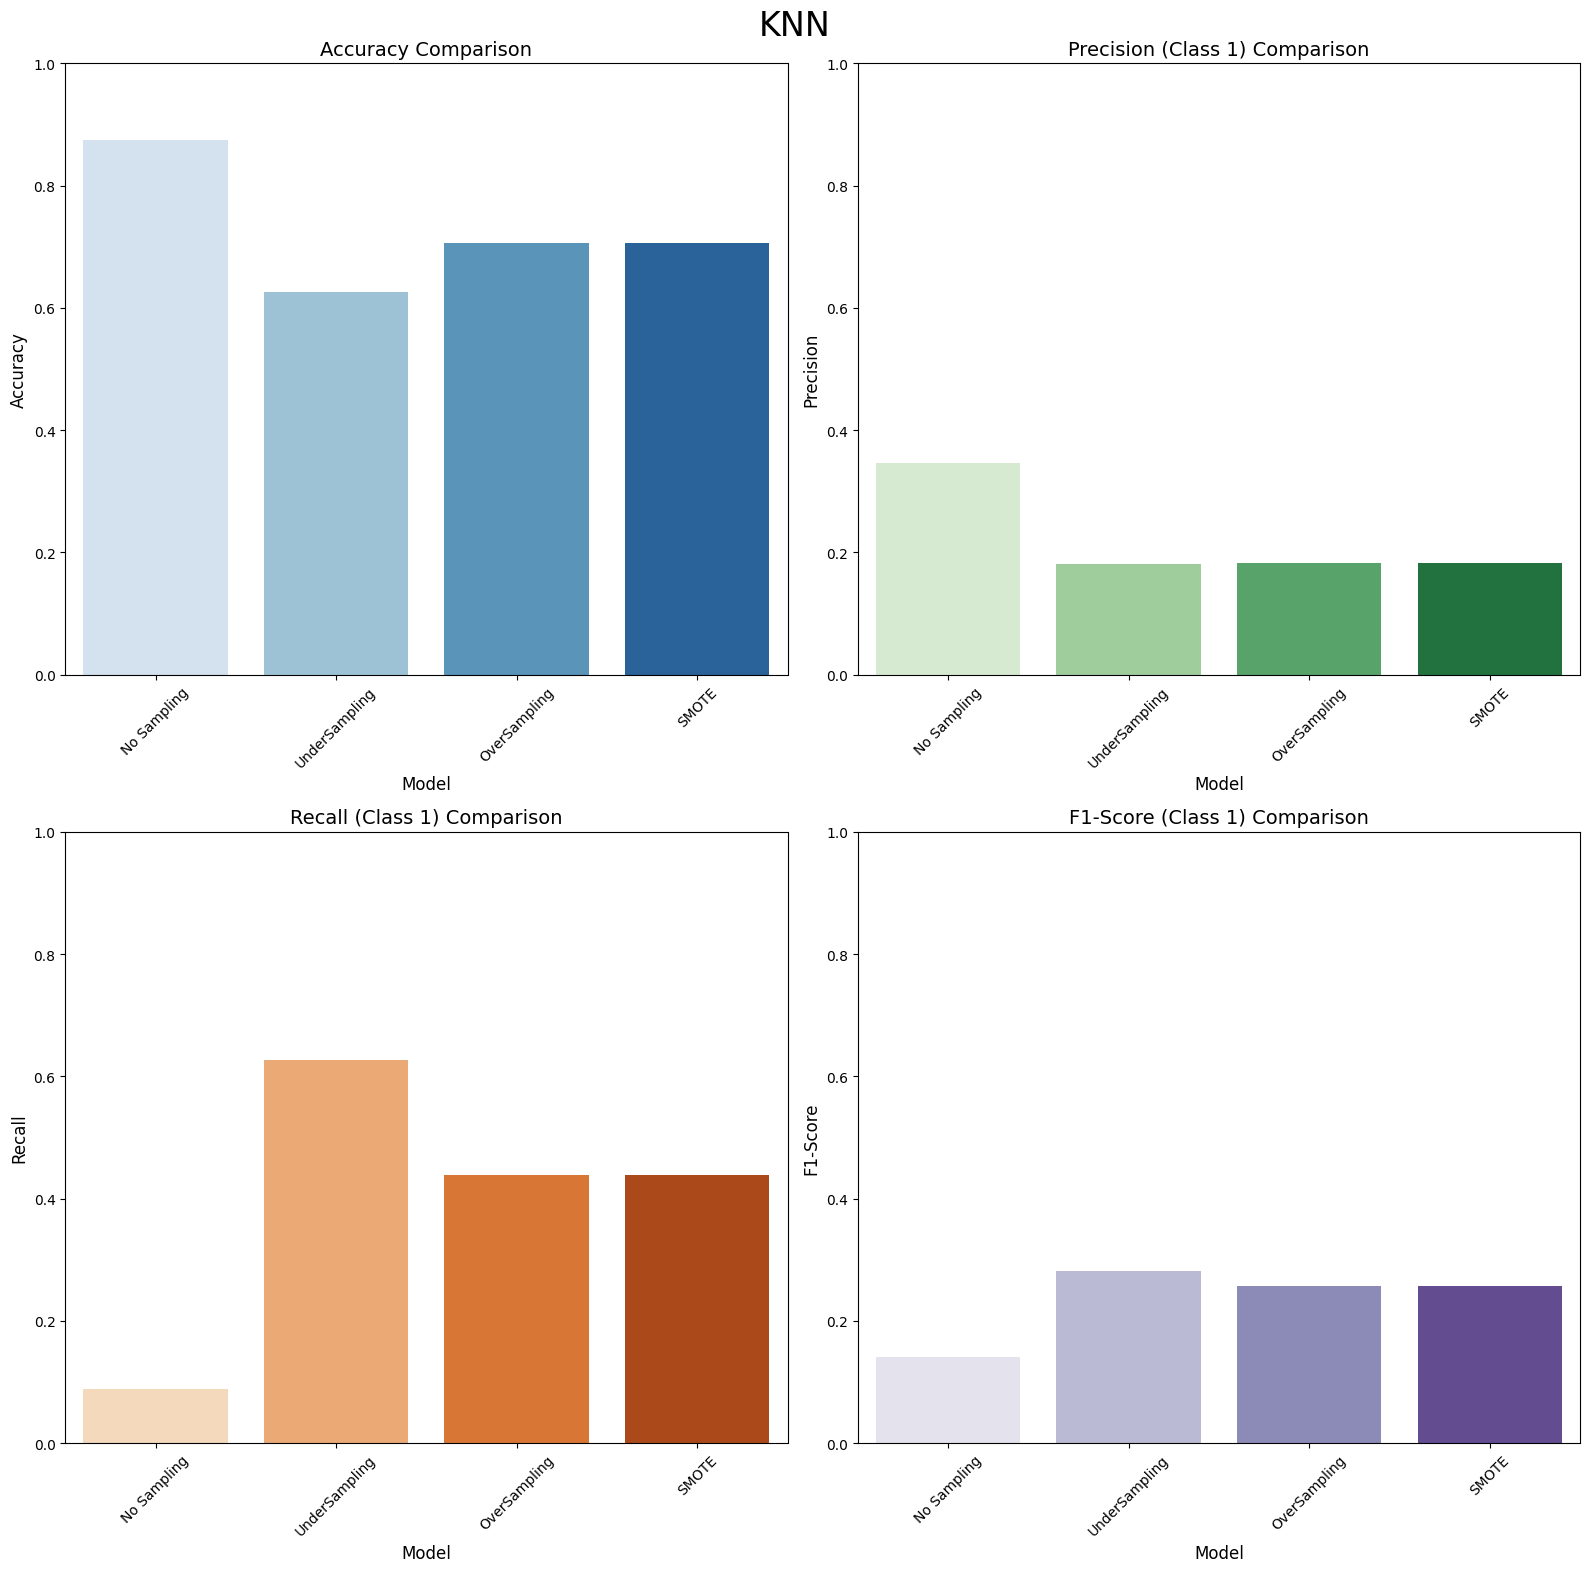

In [188]:
#Show Bar chart comparing metrics for Decision Tree with different sampling techniques

# Reinitialize the results dictionary
results = {
    "Model": ["No Sampling", "UnderSampling", "OverSampling", "SMOTE"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_knn_us),
        accuracy_score(y_test, y_pred_knn_os),
        accuracy_score(y_test, y_pred_knn_smote)
    ],
    "Precision (Class 1)": [
        classification_report(y_test, y_pred_knn, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_knn_us, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_knn_os, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_knn_smote, output_dict=True)['1']['precision']
    ],
    "Recall (Class 1)": [
        classification_report(y_test, y_pred_knn, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_knn_us, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_knn_os, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_knn_smote, output_dict=True)['1']['recall']
    ],
    "F1-Score (Class 1)": [
        classification_report(y_test, y_pred_knn, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_knn_us, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_knn_os, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_knn_smote, output_dict=True)['1']['f1-score']
    ]
}

# Convert to DataFrame and visualize
results_df = pd.DataFrame(results)

# Visualize results
#plt.figure(figsize=(16, 16))
fig, axes = plt.subplots(2, 2, figsize=(16, 16))  # Create subplots with fig and axes
fig.suptitle('KNN', fontsize=24)  # Add overall title


# Accuracy comparison
plt.subplot(2, 2, 1)
sns.barplot(data=results_df, x="Model", y="Accuracy", hue="Model", dodge=False, palette="Blues", legend=False)
plt.title("Accuracy Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Precision comparison
plt.subplot(2, 2, 2)
sns.barplot(data=results_df, x="Model", y="Precision (Class 1)", hue="Model", dodge=False, palette="Greens", legend=False)
plt.title("Precision (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Precision", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Recall comparison
plt.subplot(2, 2, 3)
sns.barplot(data=results_df, x="Model", y="Recall (Class 1)", hue="Model", dodge=False, palette="Oranges", legend=False)
plt.title("Recall (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Recall", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# F1-Score comparison
plt.subplot(2, 2, 4)
sns.barplot(data=results_df, x="Model", y="F1-Score (Class 1)", hue="Model", dodge=False, palette="Purples", legend=False)
plt.title("F1-Score (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("F1-Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

# **XGBoost**

In [189]:
#Try XGBoost
#from xgboost import XGBClassifier

#xgb_model = XGBClassifier()

# Fit the model to the training data
#xgb_model.fit(X_train_encoded, y_train)

# **Compare models with no sampling**

In [196]:
#Show classification reports

print(f"Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred))
print("---------")
print(f"Classification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))
print("---------")
print(f"Classification Report - Decision Tree")
print(classification_report(y_test, y_pred_dt))
print("---------")
print(f"Classification Report - KNN")
print(classification_report(y_test, y_pred_knn))


Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     56410
           1       0.63      0.07      0.13      7427

    accuracy                           0.89     63837
   macro avg       0.76      0.53      0.53     63837
weighted avg       0.86      0.89      0.85     63837

---------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     56410
           1       0.62      0.04      0.08      7427

    accuracy                           0.89     63837
   macro avg       0.75      0.52      0.51     63837
weighted avg       0.86      0.89      0.84     63837

---------
Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     56410
           1       0.20      0.23      0.21      7427

    accuracy                           0.8

**Note: Without any resampling, the best model is DecisionTree**


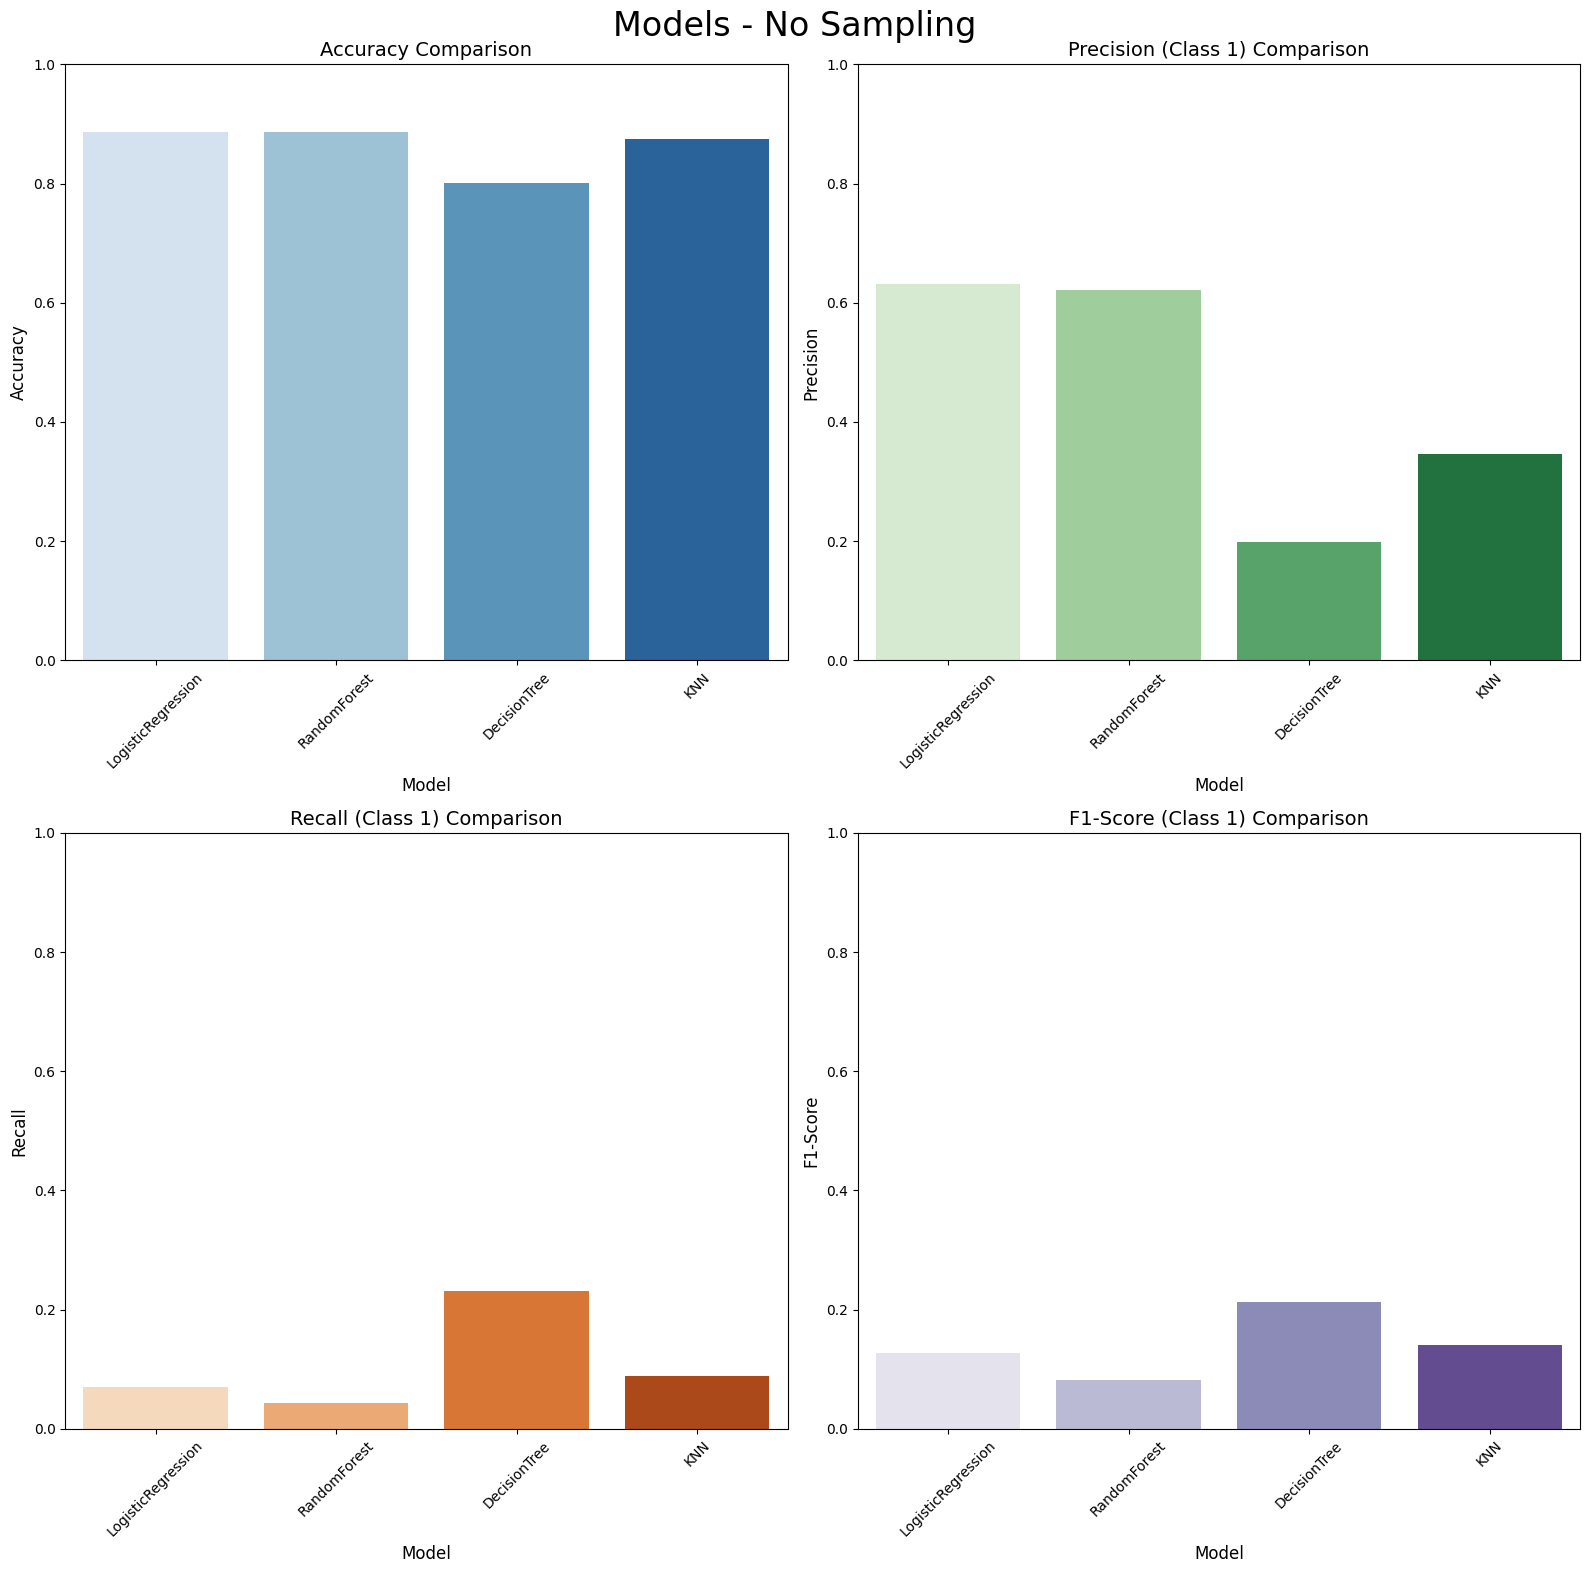

In [197]:
#Show Bar chart comparing metrics for Models with no samplig with different sampling techniques

# Reinitialize the results dictionary
results = {
    "Model": ["LogisticRegression", "RandomForest", "DecisionTree", "KNN"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_knn)
    ],
    "Precision (Class 1)": [
        classification_report(y_test, y_pred, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_knn, output_dict=True)['1']['precision']
    ],
    "Recall (Class 1)": [
        classification_report(y_test, y_pred, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_knn, output_dict=True)['1']['recall']
    ],
    "F1-Score (Class 1)": [
        classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_knn, output_dict=True)['1']['f1-score']
    ]
}

# Convert to DataFrame and visualize
results_df = pd.DataFrame(results)

# Visualize results
#plt.figure(figsize=(16, 16))
fig, axes = plt.subplots(2, 2, figsize=(16, 16))  # Create subplots with fig and axes
fig.suptitle('Models - No Sampling', fontsize=24)  # Add overall title


# Accuracy comparison
plt.subplot(2, 2, 1)
sns.barplot(data=results_df, x="Model", y="Accuracy", hue="Model", dodge=False, palette="Blues", legend=False)
plt.title("Accuracy Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Precision comparison
plt.subplot(2, 2, 2)
sns.barplot(data=results_df, x="Model", y="Precision (Class 1)", hue="Model", dodge=False, palette="Greens", legend=False)
plt.title("Precision (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Precision", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Recall comparison
plt.subplot(2, 2, 3)
sns.barplot(data=results_df, x="Model", y="Recall (Class 1)", hue="Model", dodge=False, palette="Oranges", legend=False)
plt.title("Recall (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Recall", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# F1-Score comparison
plt.subplot(2, 2, 4)
sns.barplot(data=results_df, x="Model", y="F1-Score (Class 1)", hue="Model", dodge=False, palette="Purples", legend=False)
plt.title("F1-Score (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("F1-Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

# **Compare best iteration of each model type**

In [198]:
print("---------Best Results------------")
print(f"Classification Report - Oversampling and Logistic Regression")
print(classification_report(y_test, y_pred_oversampled))
print("---------")
print(f"Classification Report - Oversampling and RandomForestClassifier")
print(classification_report(y_test, oversample_y_pred_rf ))
print("---------")
print(f"Classification Report - Oversampling and DecisionTree")
print(classification_report(y_test, oversample_y_pred_dt))
print("---------")
print(f"Classification Report - KNN - UnderSampling")
print(classification_report(y_test, y_pred_knn_us))

---------Best Results------------
Classification Report - Oversampling and Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.23      0.69      0.34      7427

    accuracy                           0.69     63837
   macro avg       0.59      0.69      0.57     63837
weighted avg       0.86      0.69      0.75     63837

---------
Classification Report - Oversampling and RandomForestClassifier
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.22      0.66      0.33      7427

    accuracy                           0.69     63837
   macro avg       0.58      0.68      0.56     63837
weighted avg       0.86      0.69      0.74     63837

---------
Classification Report - Oversampling and DecisionTree
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
    

The best results were achieved with a combination of the Logisitic Regression model and OverSampling.  It achieves the highest precision on the 1 class.  This metric is key for banks to avoid making loans that will default.

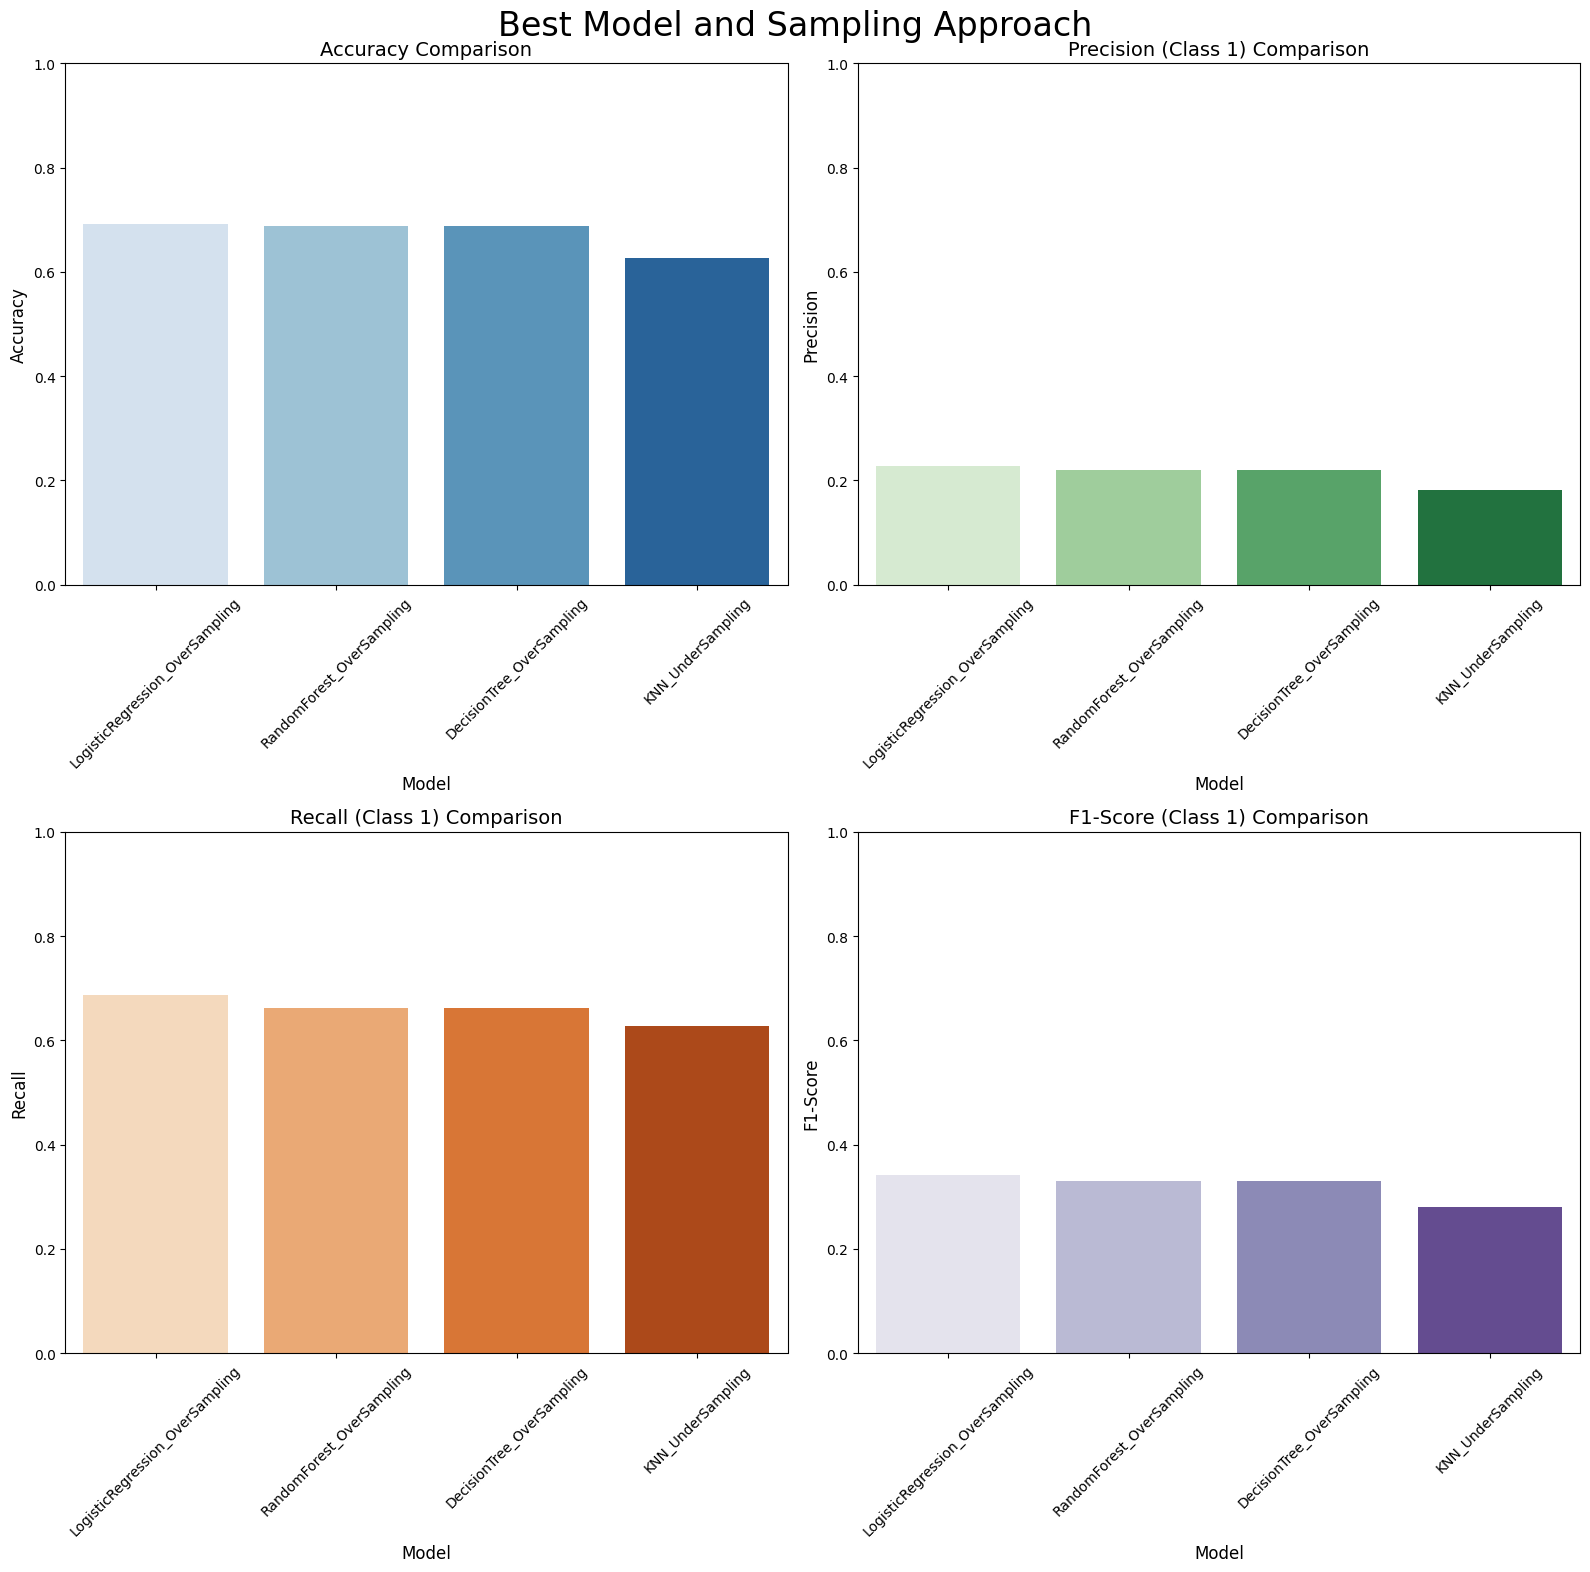

In [199]:
#Show Bar chart comparing metrics for Models with no samplig with different sampling techniques

# Reinitialize the results dictionary
results = {
    "Model": ["LogisticRegression_OverSampling", "RandomForest_OverSampling", "DecisionTree_OverSampling", "KNN_UnderSampling"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_oversampled),
        accuracy_score(y_test, oversample_y_pred_rf),
        accuracy_score(y_test, oversample_y_pred_dt),
        accuracy_score(y_test, y_pred_knn_us)
    ],
    "Precision (Class 1)": [
        classification_report(y_test, y_pred_oversampled, output_dict=True)['1']['precision'],
        classification_report(y_test, oversample_y_pred_rf, output_dict=True)['1']['precision'],
        classification_report(y_test, oversample_y_pred_dt, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_knn_us, output_dict=True)['1']['precision']
    ],
    "Recall (Class 1)": [
        classification_report(y_test, y_pred_oversampled, output_dict=True)['1']['recall'],
        classification_report(y_test, oversample_y_pred_rf, output_dict=True)['1']['recall'],
        classification_report(y_test, oversample_y_pred_dt, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_knn_us, output_dict=True)['1']['recall']
    ],
    "F1-Score (Class 1)": [
        classification_report(y_test, y_pred_oversampled, output_dict=True)['1']['f1-score'],
        classification_report(y_test, oversample_y_pred_rf, output_dict=True)['1']['f1-score'],
        classification_report(y_test, oversample_y_pred_dt, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_knn_us, output_dict=True)['1']['f1-score']
    ]
}

# Convert to DataFrame and visualize
results_df = pd.DataFrame(results)

# Visualize results
#plt.figure(figsize=(16, 16))
fig, axes = plt.subplots(2, 2, figsize=(16, 16))  # Create subplots with fig and axes
fig.suptitle('Best Model and Sampling Approach', fontsize=24)  # Add overall title


# Accuracy comparison
plt.subplot(2, 2, 1)
sns.barplot(data=results_df, x="Model", y="Accuracy", hue="Model", dodge=False, palette="Blues", legend=False)
plt.title("Accuracy Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Precision comparison
plt.subplot(2, 2, 2)
sns.barplot(data=results_df, x="Model", y="Precision (Class 1)", hue="Model", dodge=False, palette="Greens", legend=False)
plt.title("Precision (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Precision", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Recall comparison
plt.subplot(2, 2, 3)
sns.barplot(data=results_df, x="Model", y="Recall (Class 1)", hue="Model", dodge=False, palette="Oranges", legend=False)
plt.title("Recall (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Recall", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# F1-Score comparison
plt.subplot(2, 2, 4)
sns.barplot(data=results_df, x="Model", y="F1-Score (Class 1)", hue="Model", dodge=False, palette="Purples", legend=False)
plt.title("F1-Score (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("F1-Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()